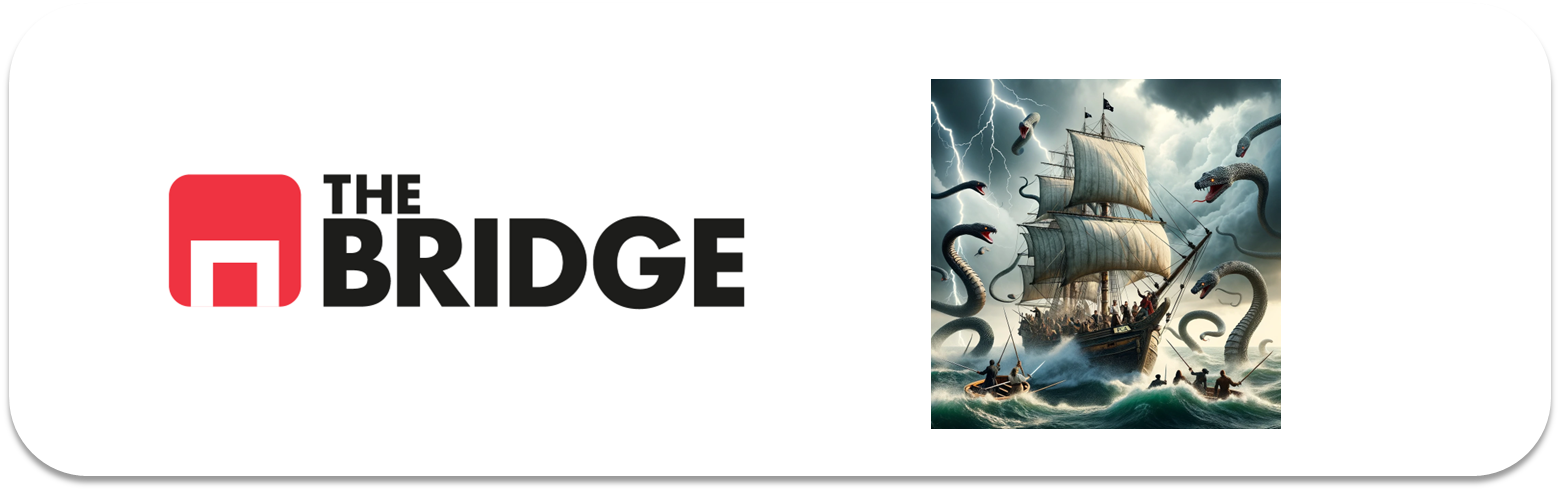

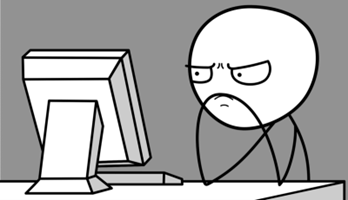

Para ejercitarte y afianzar lo aprendido sobre **Seleccion de Features**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

## Feature selection: Breast Cancer Winsconsin

El objetivo de este grupo de ejercicio es dar a entender la importancia de la selección de características (features), así como probar distintos métodos de reducción de características (features) y qué influencia puede tener el reducir features en el perfomance de un modelo. Nuestro target para evaluar el perfomance será si estamos ante tumores malignos o benignos.

Vamos a trabajar con el dataset de Breast Cancer Winsconsin, datos tomados a partir de radiografías.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import viztools as viz

### Ejercicio 1:

Carga los datos y haz una primera inspección de los mismos y comenta lo que creas conveniente sobre las features y su relación entre sí (pero sin analizarlas numéricamente)

In [2]:
df = pd.read_csv('./data/breastcancer-winsconsin.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Ejercicio 2:

Descarta las características que evidentemente no aportan información.

In [4]:
df.drop(['id','Unnamed: 32'], axis=1, inplace=True)

### Ejercicio 3: 

Divide en train y test. Analiza el target de forma breve.

In [5]:
target = 'diagnosis'

In [6]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, stratify=df[target], random_state=42)

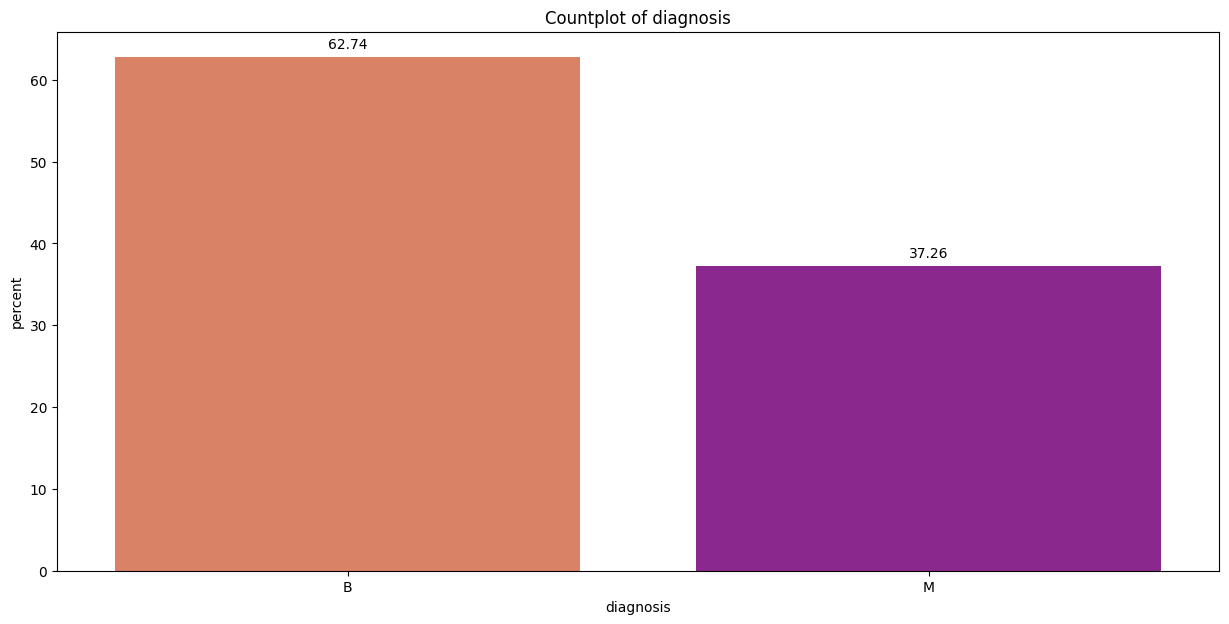

In [7]:
viz.countplot(df, cat_col=target, stat='percent', show_vals=True)

In [8]:
df[target].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

### Ejercicio 4: MiniEDA (I) Análisis Visual

Realiza un análisis visual de las features y haz tu selección de primera "división" (que luego usaremos para comparar con otros métodos de selección).

In [9]:
features = [col for col in df.columns.to_list() if col != 'diagnosis']

In [10]:
features_se = features[10:20]
features_worst = features[20:]
features = features[:10]

radius_mean


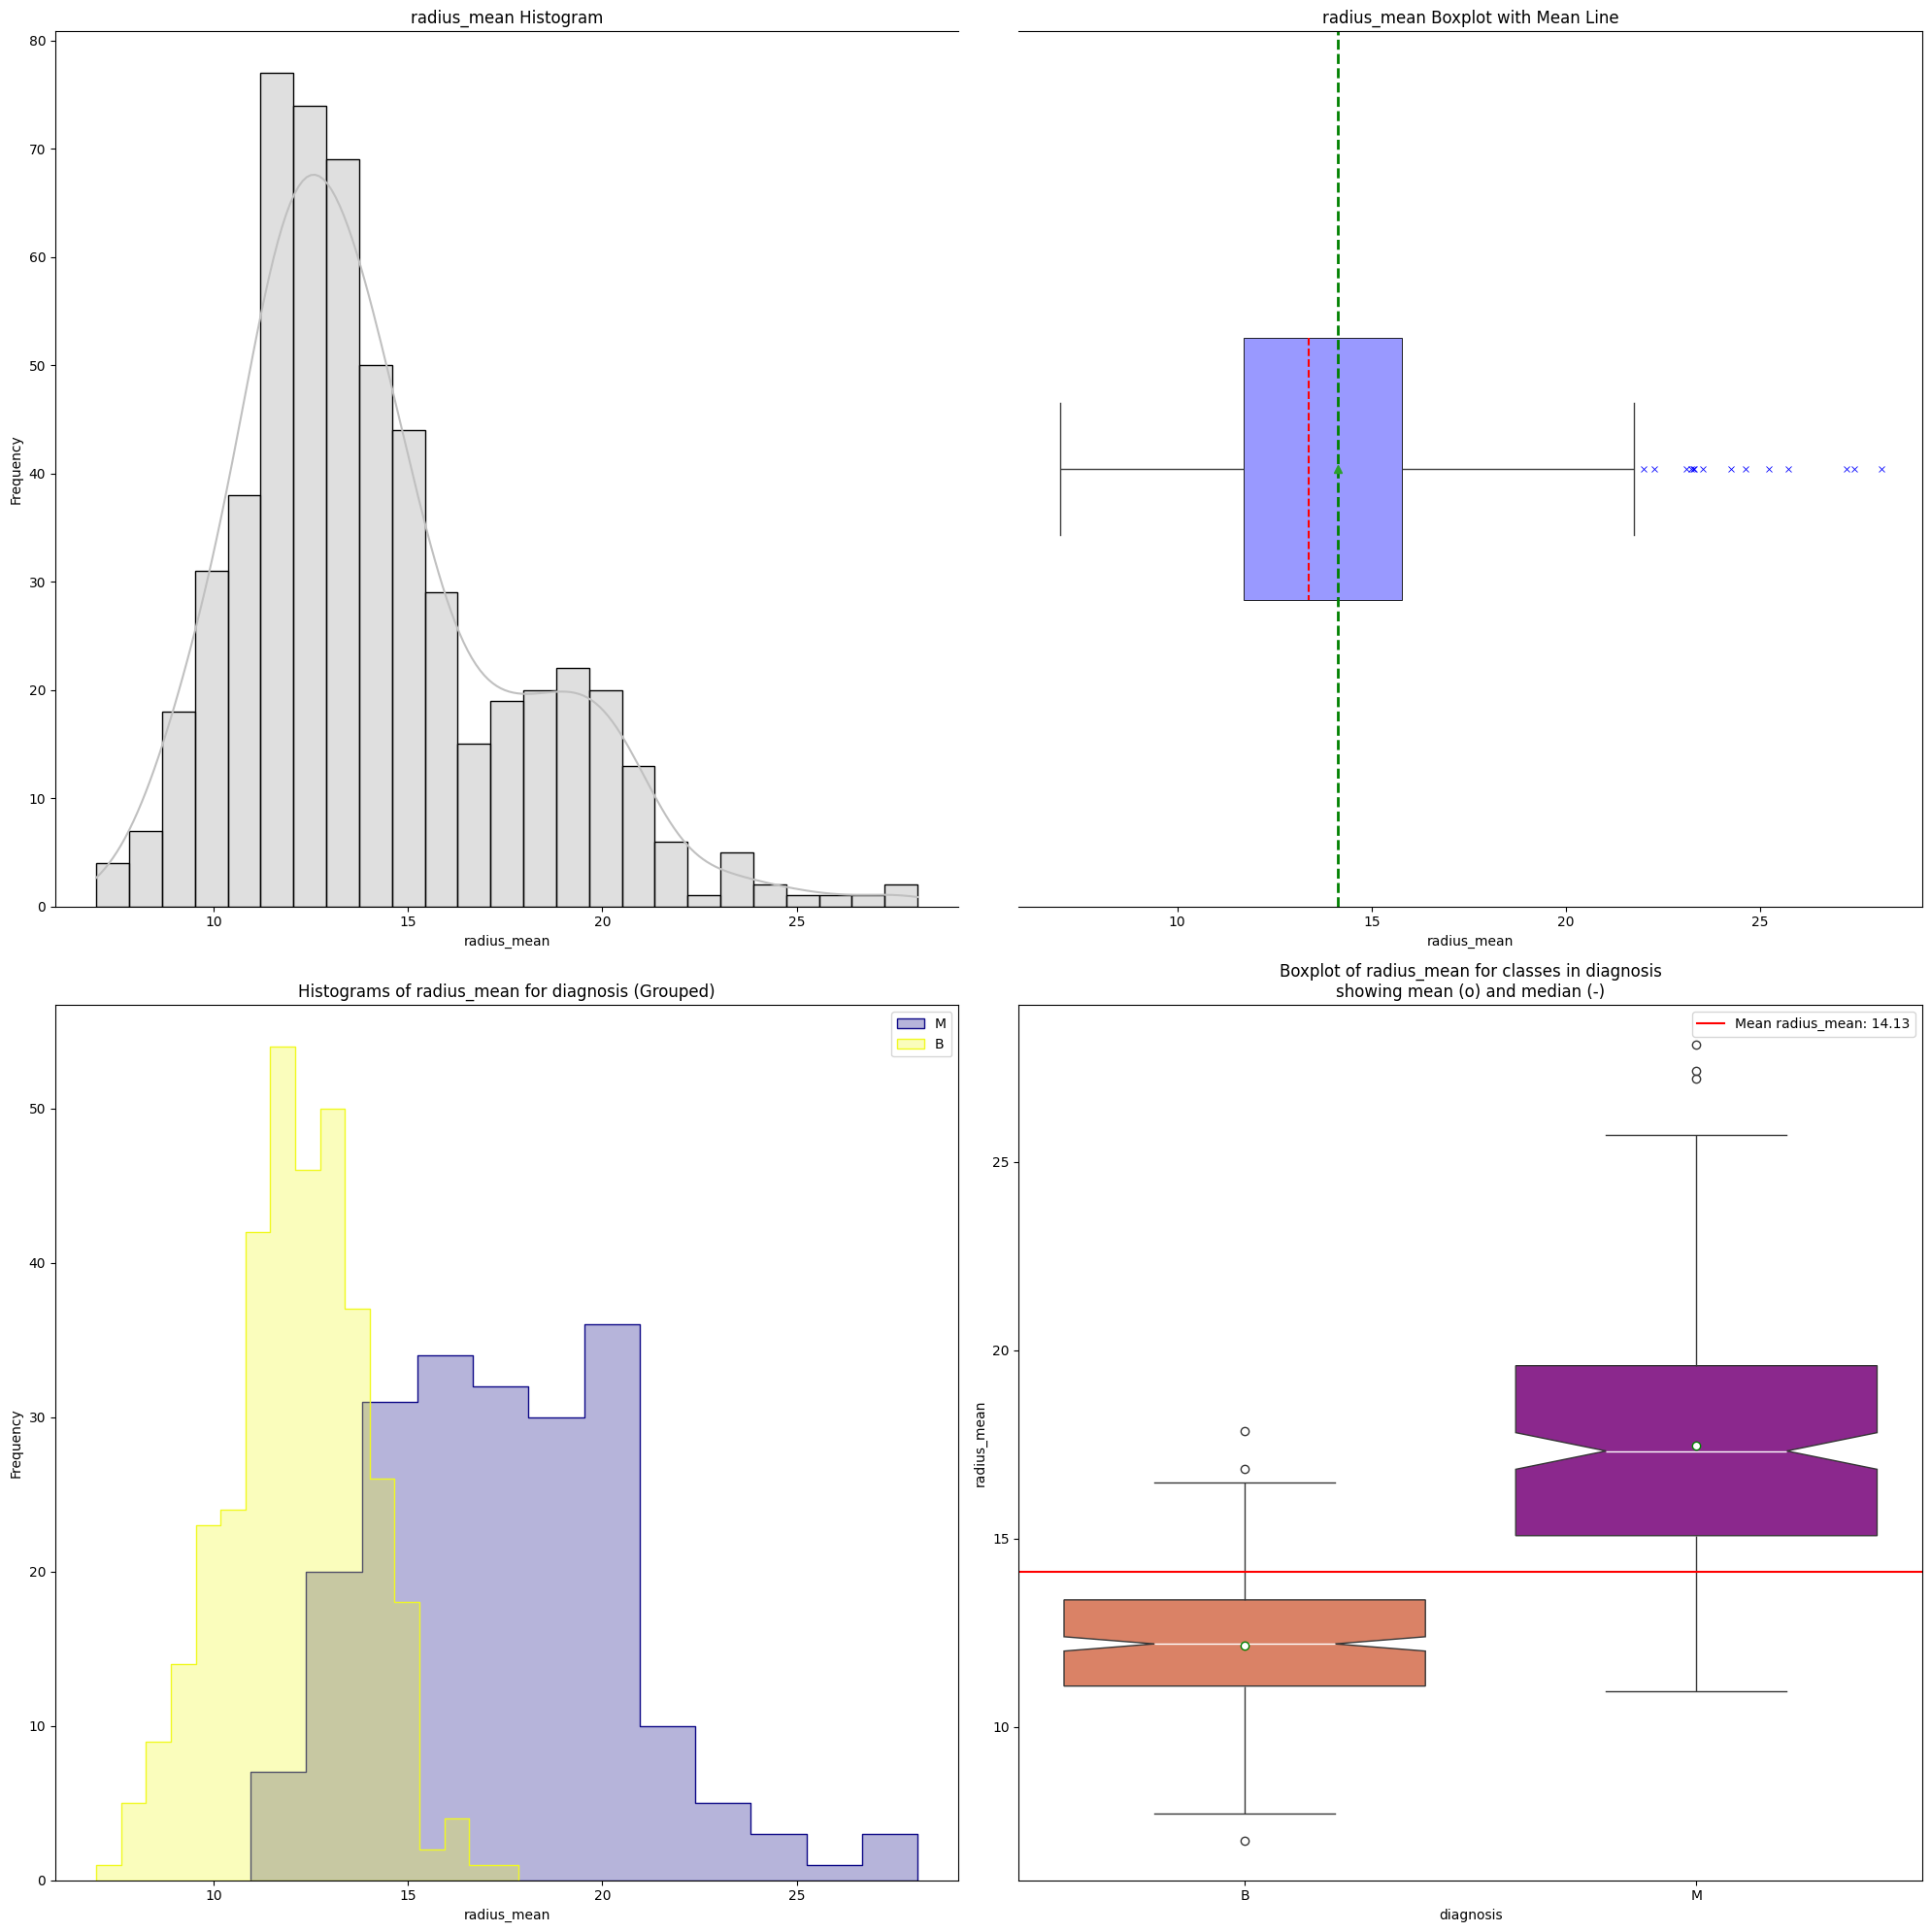

In [11]:
target = target
num_feat = features[0]
print(num_feat)
viz.plotAll4(df, cat_col=target, num_col=num_feat, show_mean=True)

- Keep

In [12]:
visualSelection = [num_feat]

---

texture_mean


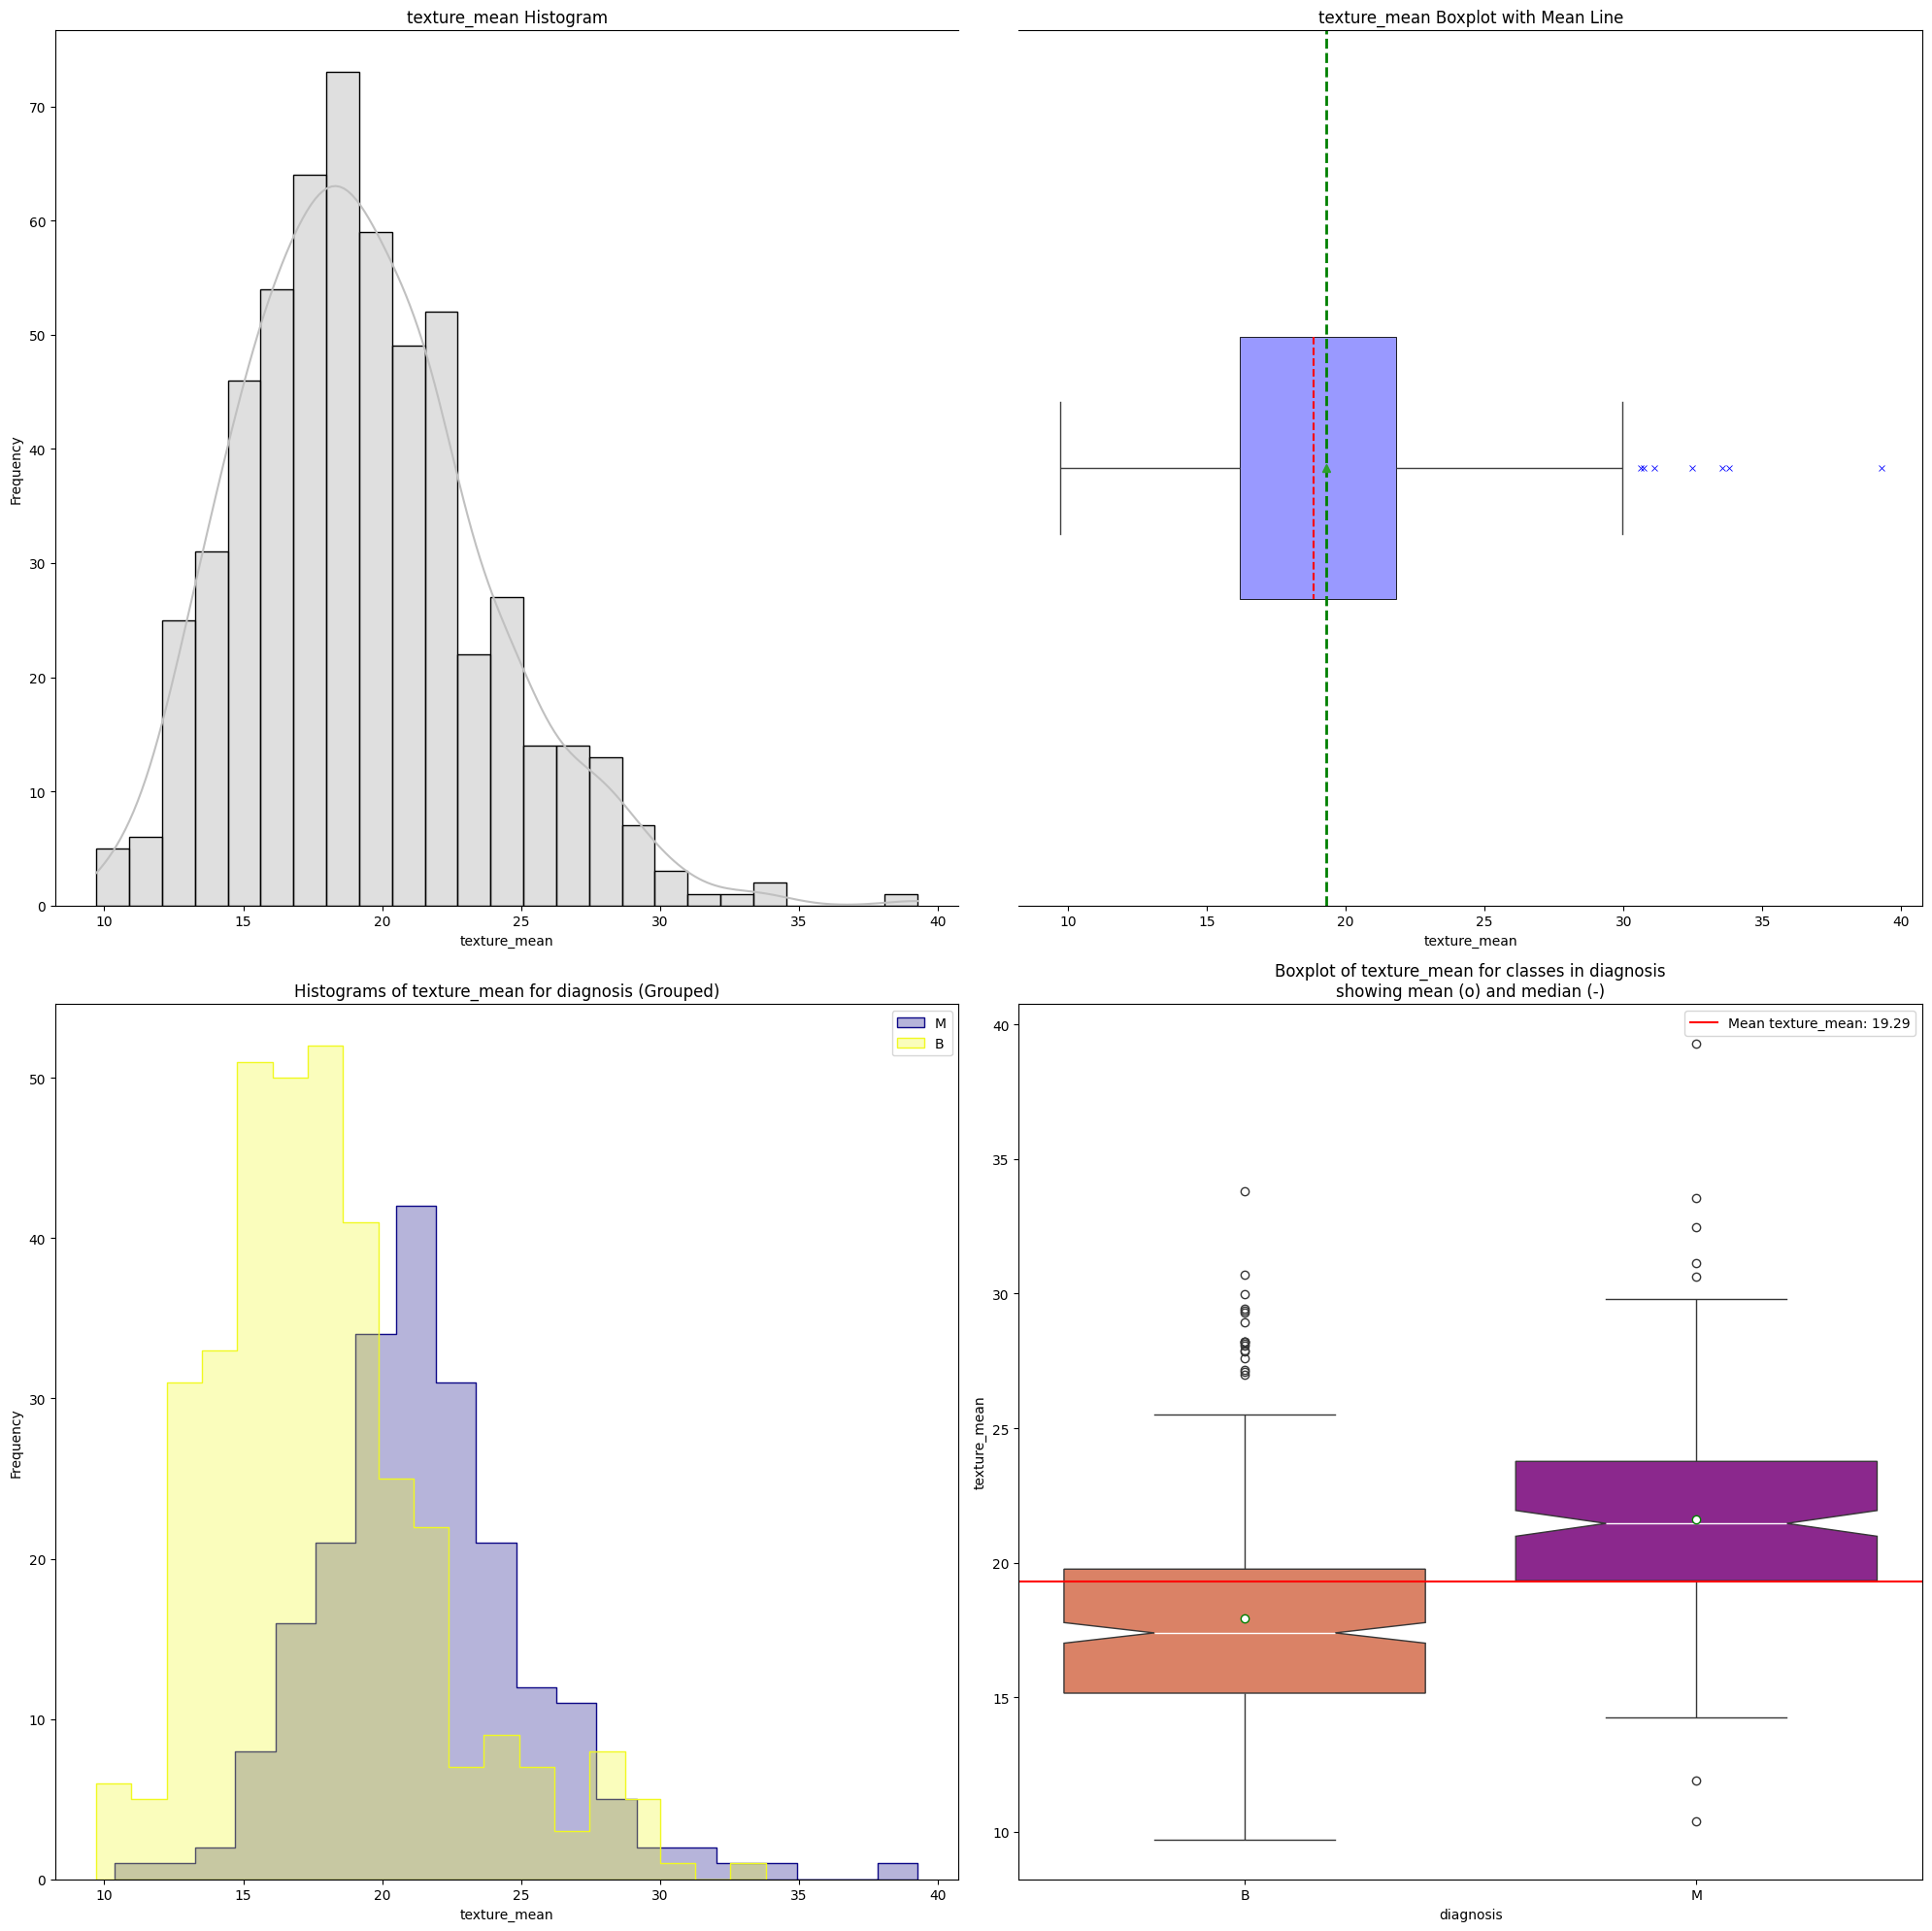

In [13]:
target = target
num_feat = features[1]
print(num_feat)
viz.plotAll4(df, cat_col=target, num_col=num_feat, show_mean=True)

- keep

In [14]:
visualSelection.append(num_feat)

---

perimeter_mean


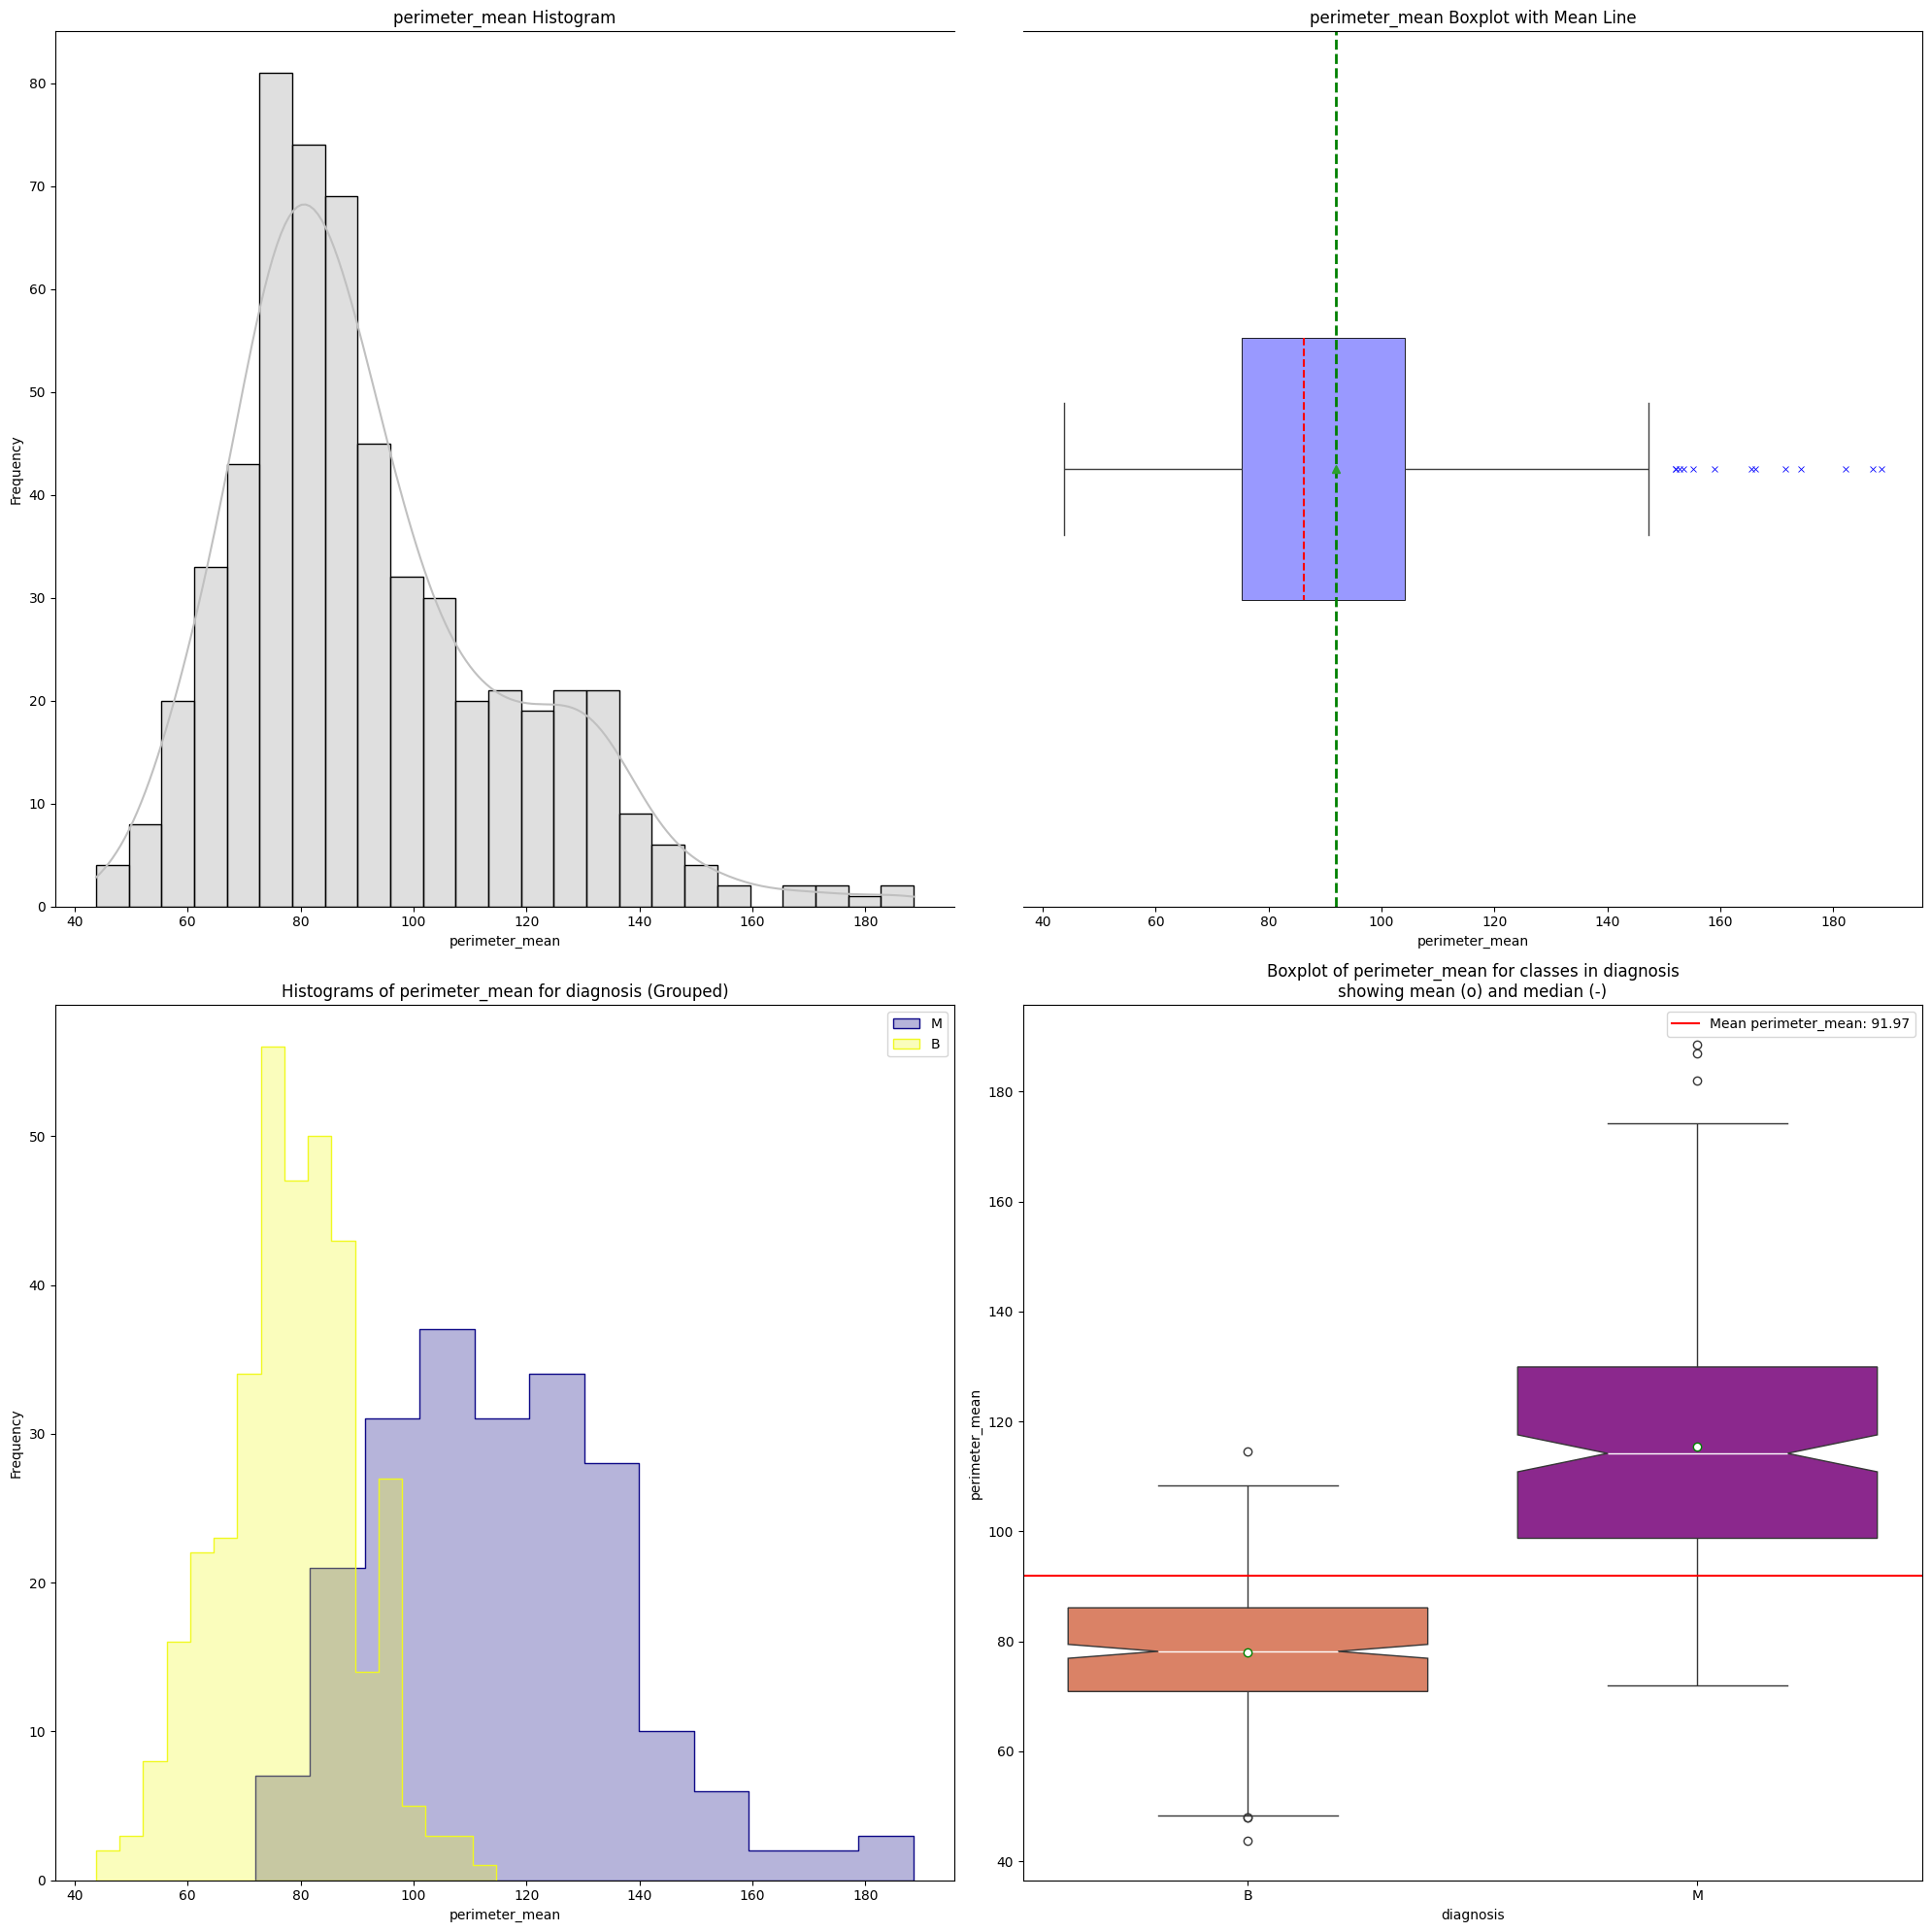

In [15]:
target = target
num_feat = features[2]
print(num_feat)
viz.plotAll4(df, cat_col=target, num_col=num_feat, show_mean=True)

- keep

In [16]:
visualSelection.append(num_feat)

---

area_mean


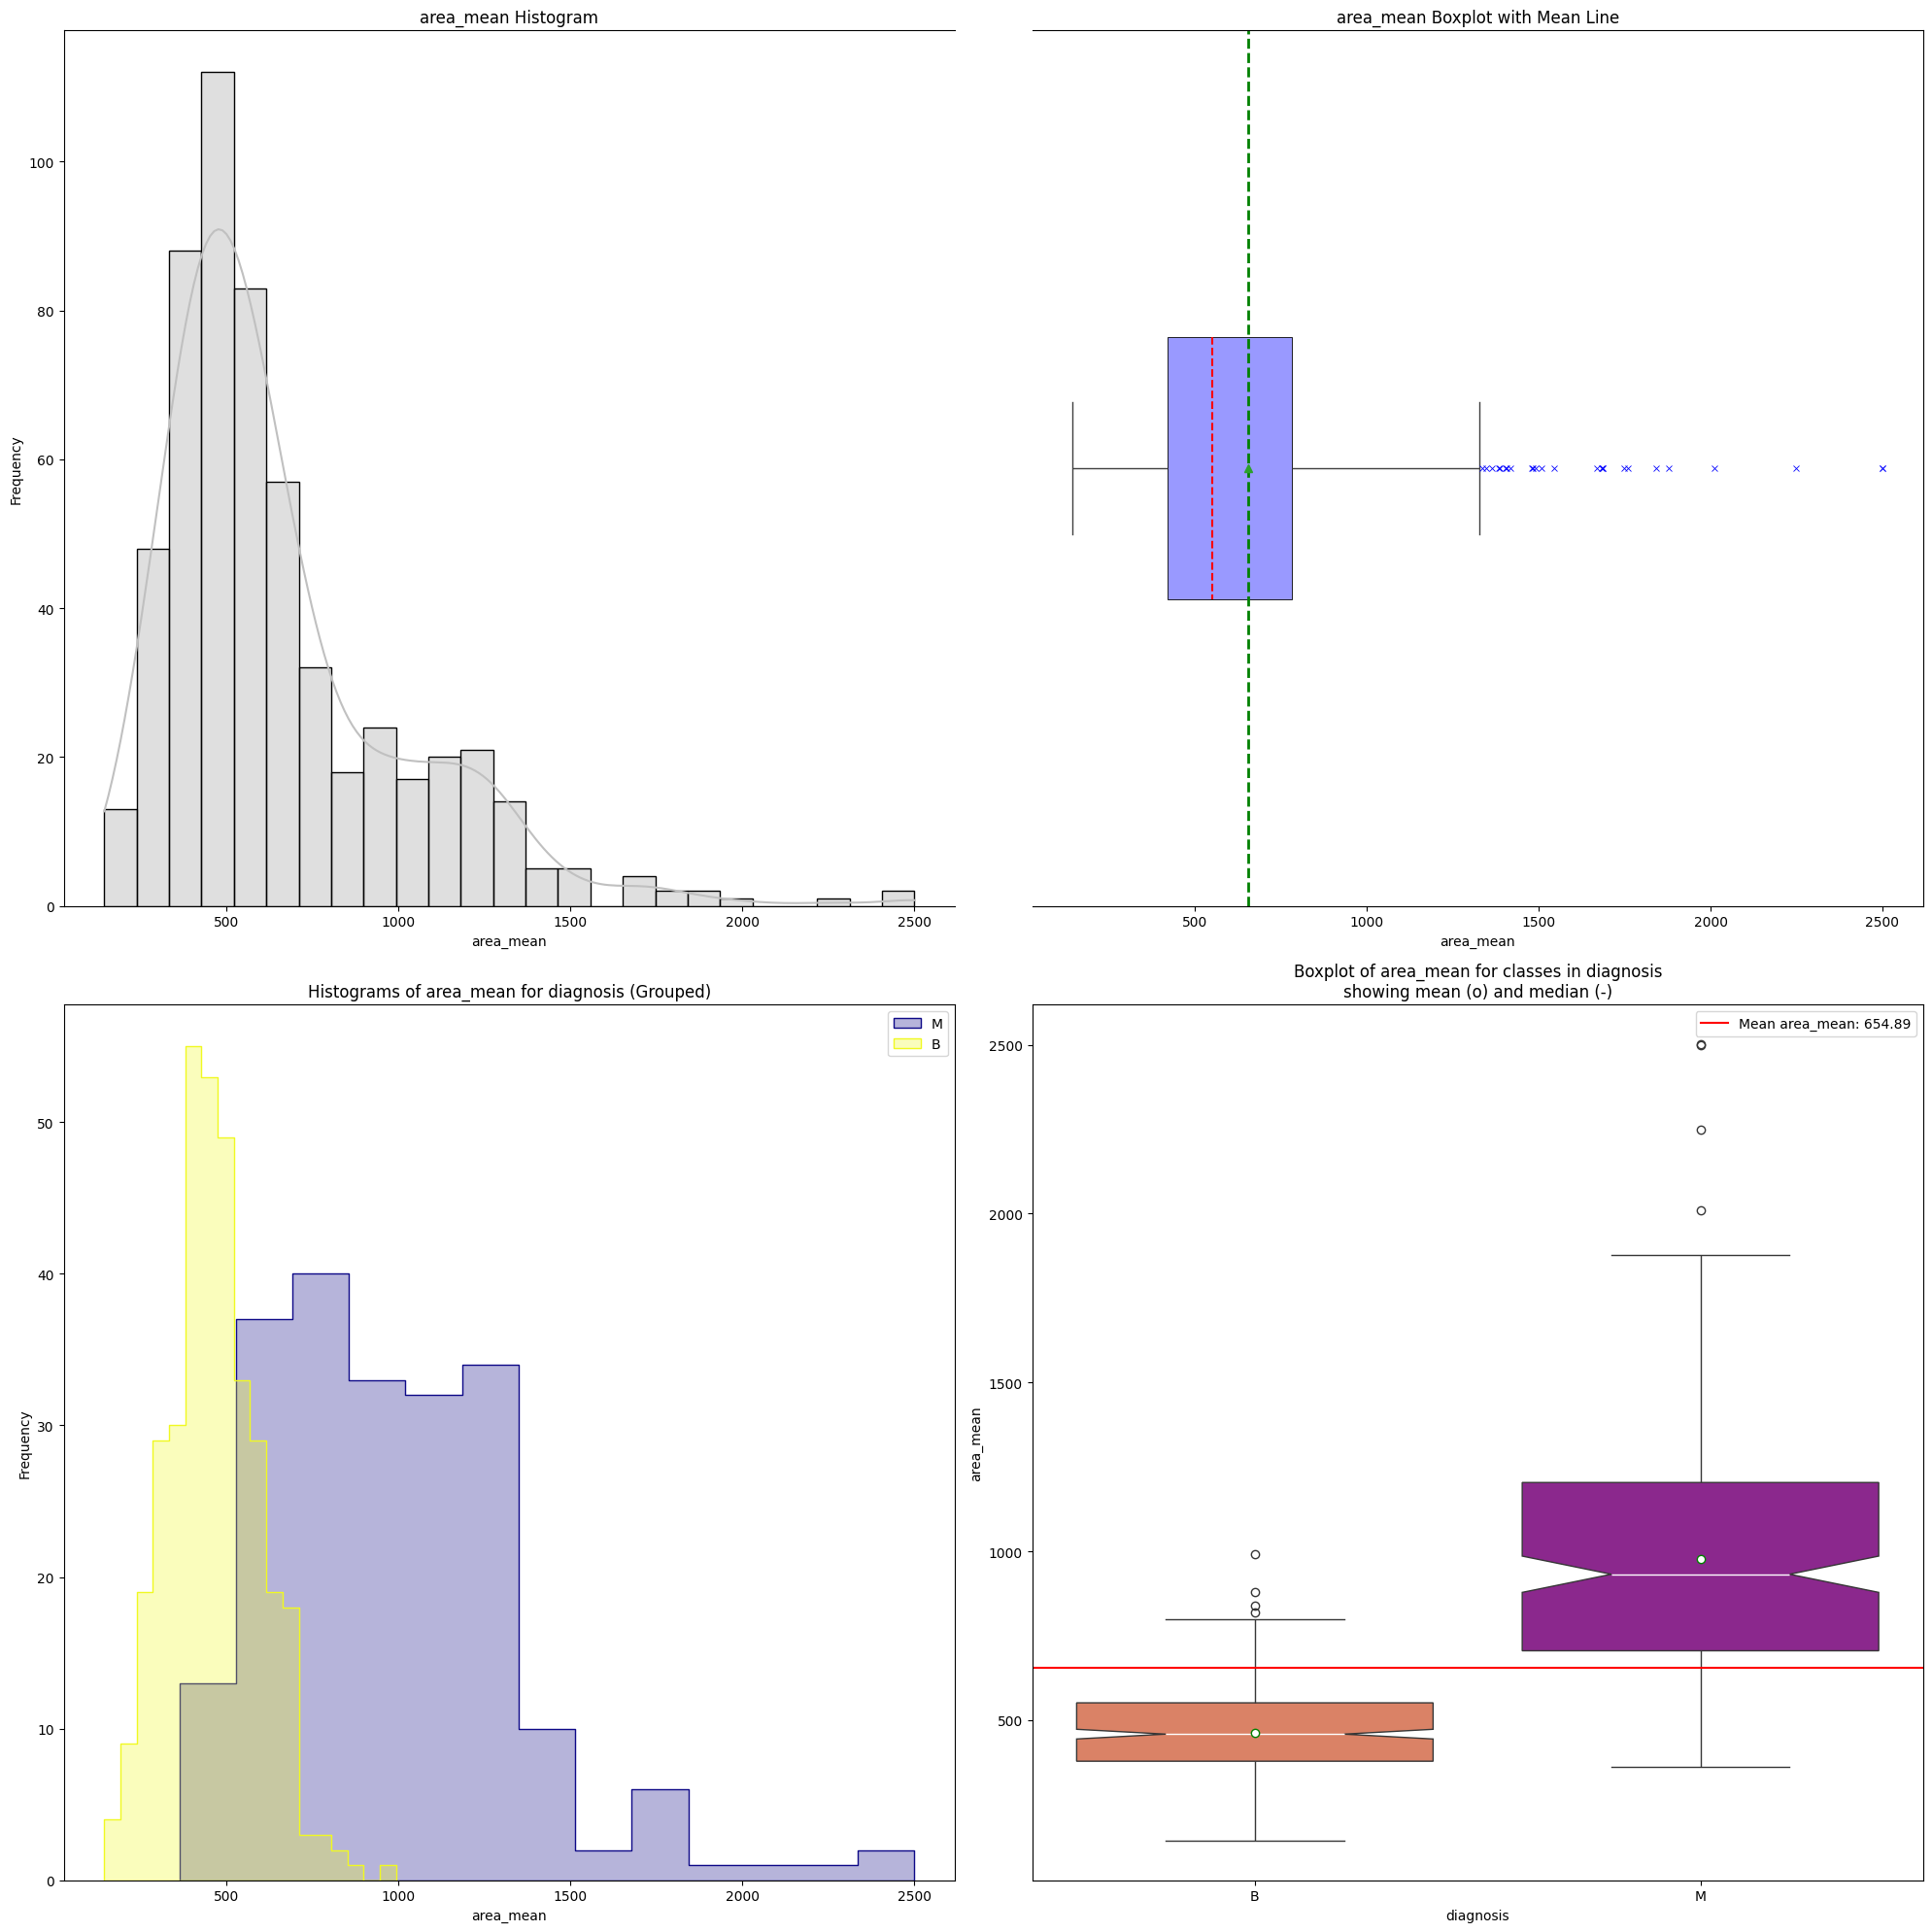

In [17]:
target = target
num_feat = features[3]
print(num_feat)
viz.plotAll4(df, cat_col=target, num_col=num_feat, show_mean=True)

- keep

In [18]:
visualSelection.append(num_feat)

---

smoothness_mean


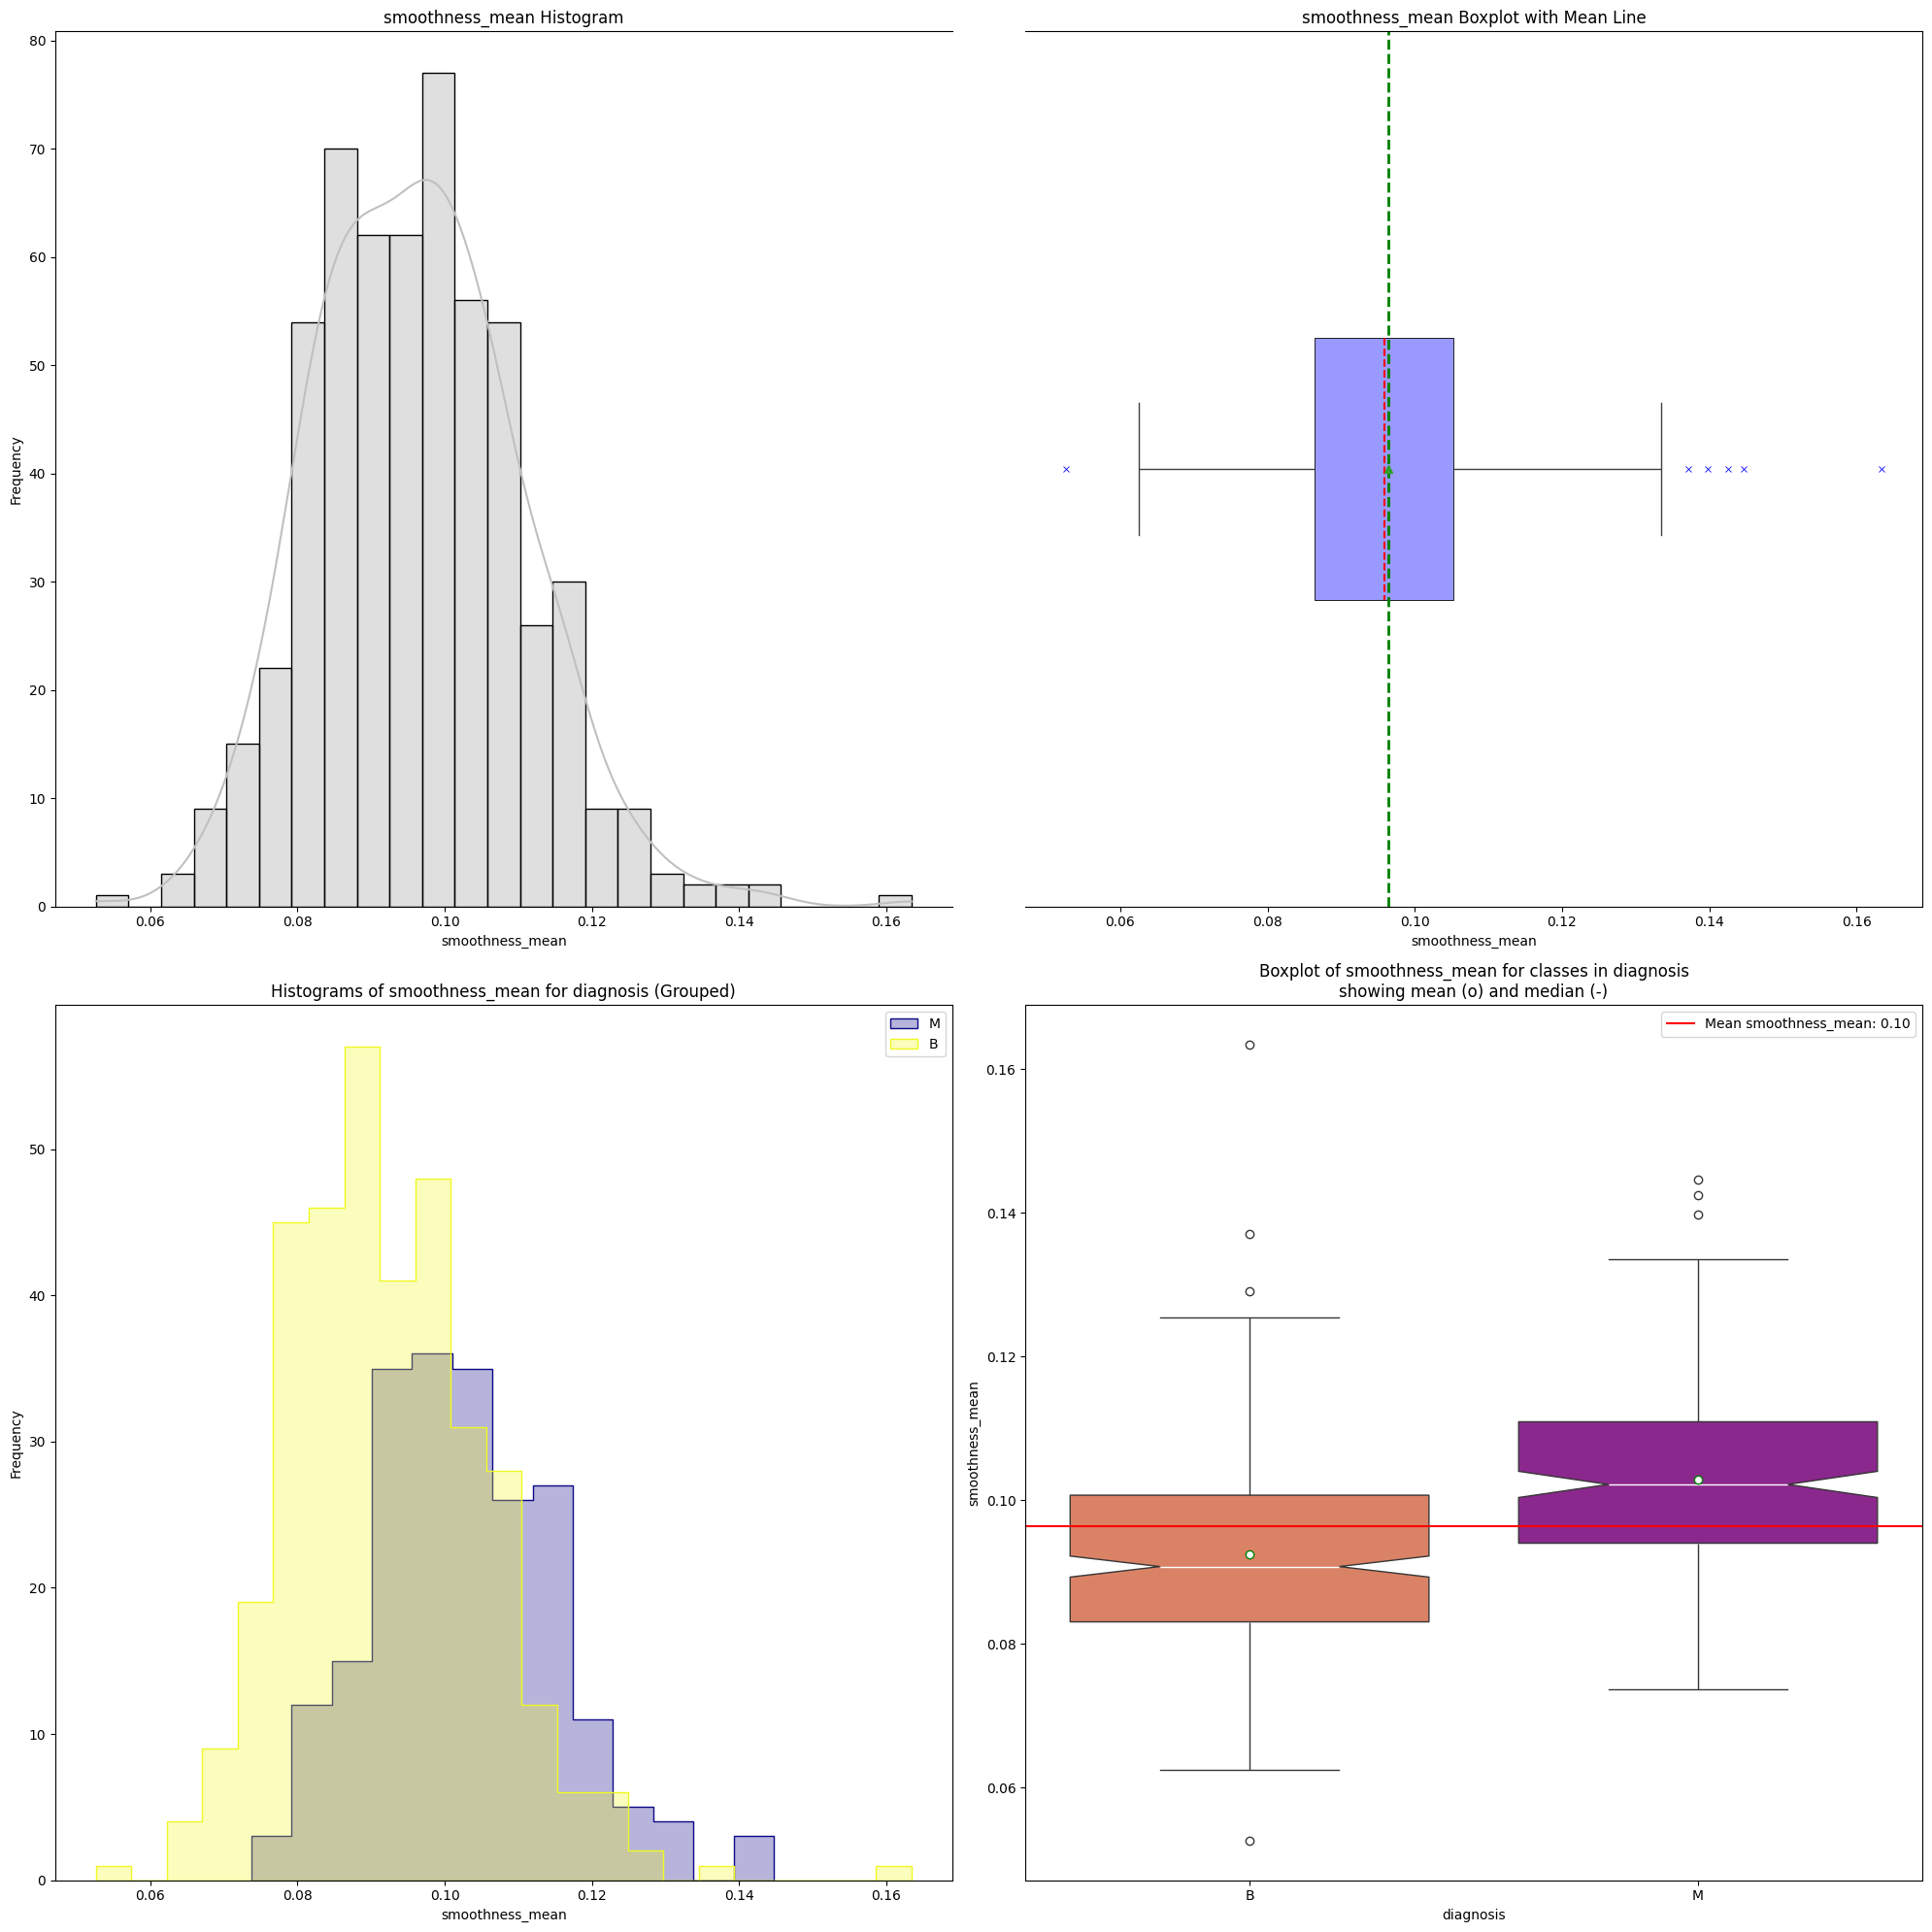

In [19]:
target = target
num_feat = features[4]
print(num_feat)
viz.plotAll4(df, cat_col=target, num_col=num_feat, show_mean=True)

- not as good but also not so bad
- keep?

In [20]:
visualSelection.append(num_feat)
visualDrop = [num_feat]

---

compactness_mean


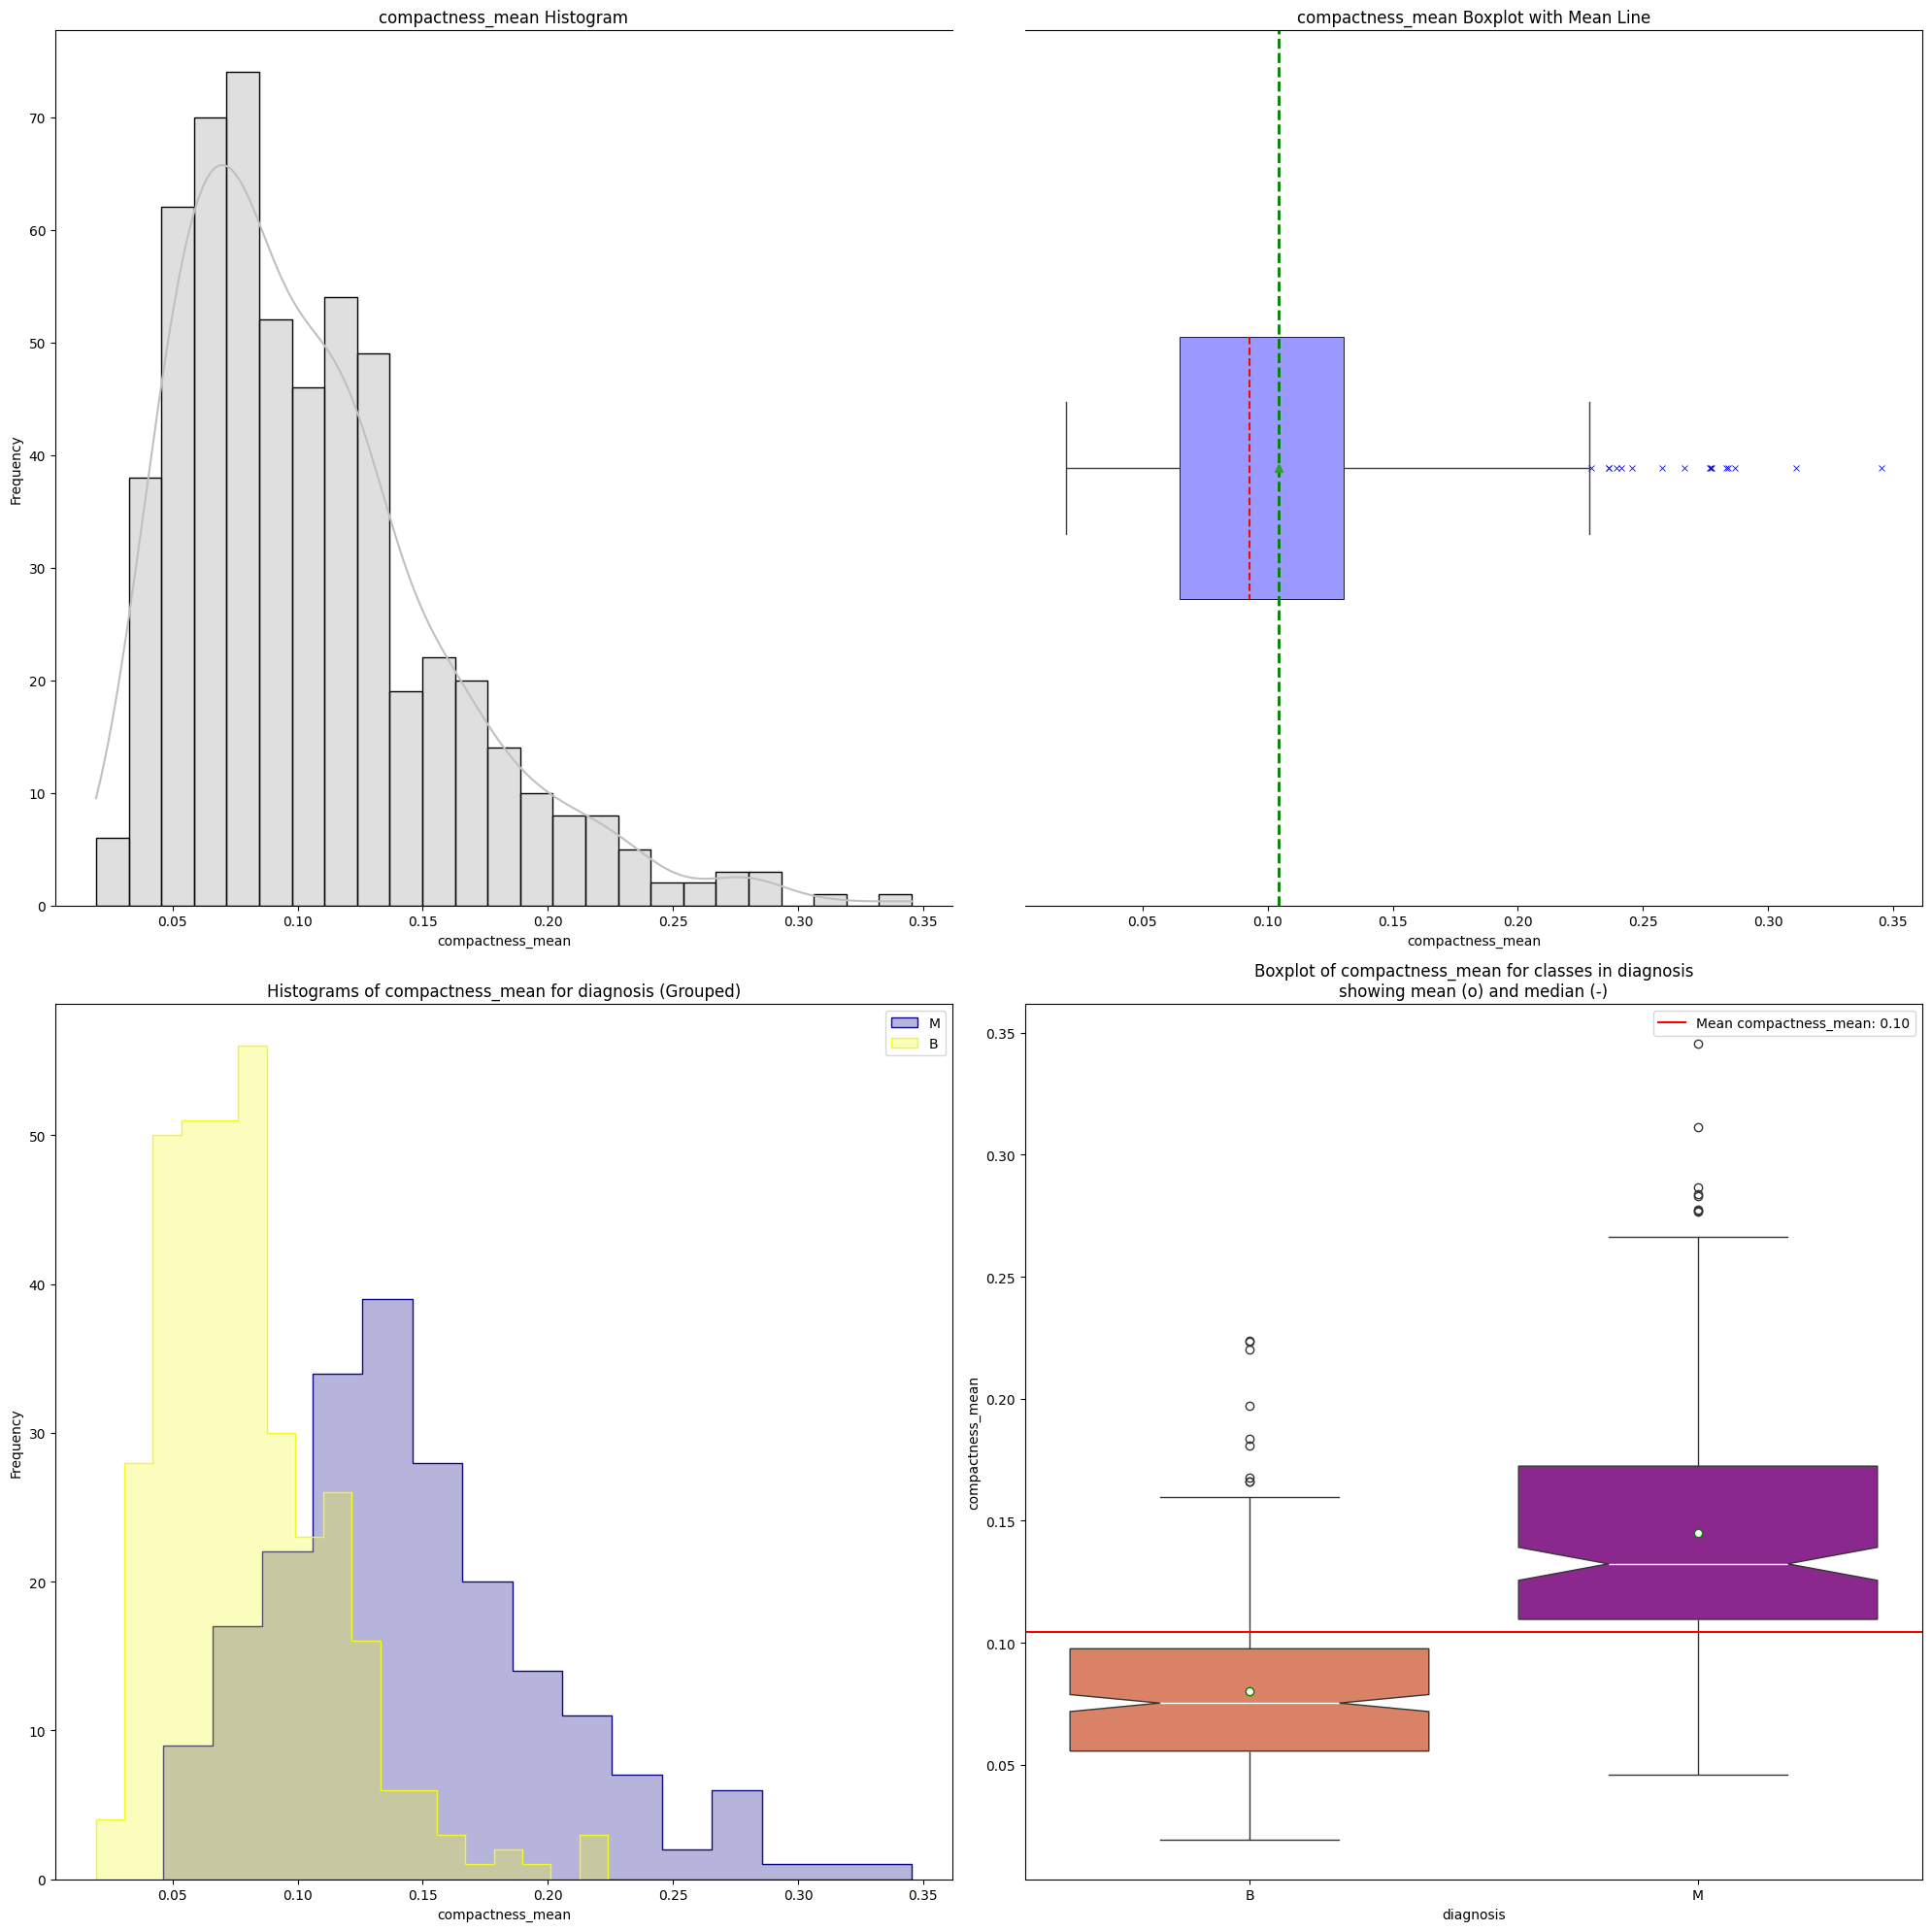

In [21]:
target = target
num_feat = features[5]
print(num_feat)
viz.plotAll4(df, cat_col=target, num_col=num_feat, show_mean=True)

- keep

In [22]:
visualSelection.append(num_feat)

---

concavity_mean


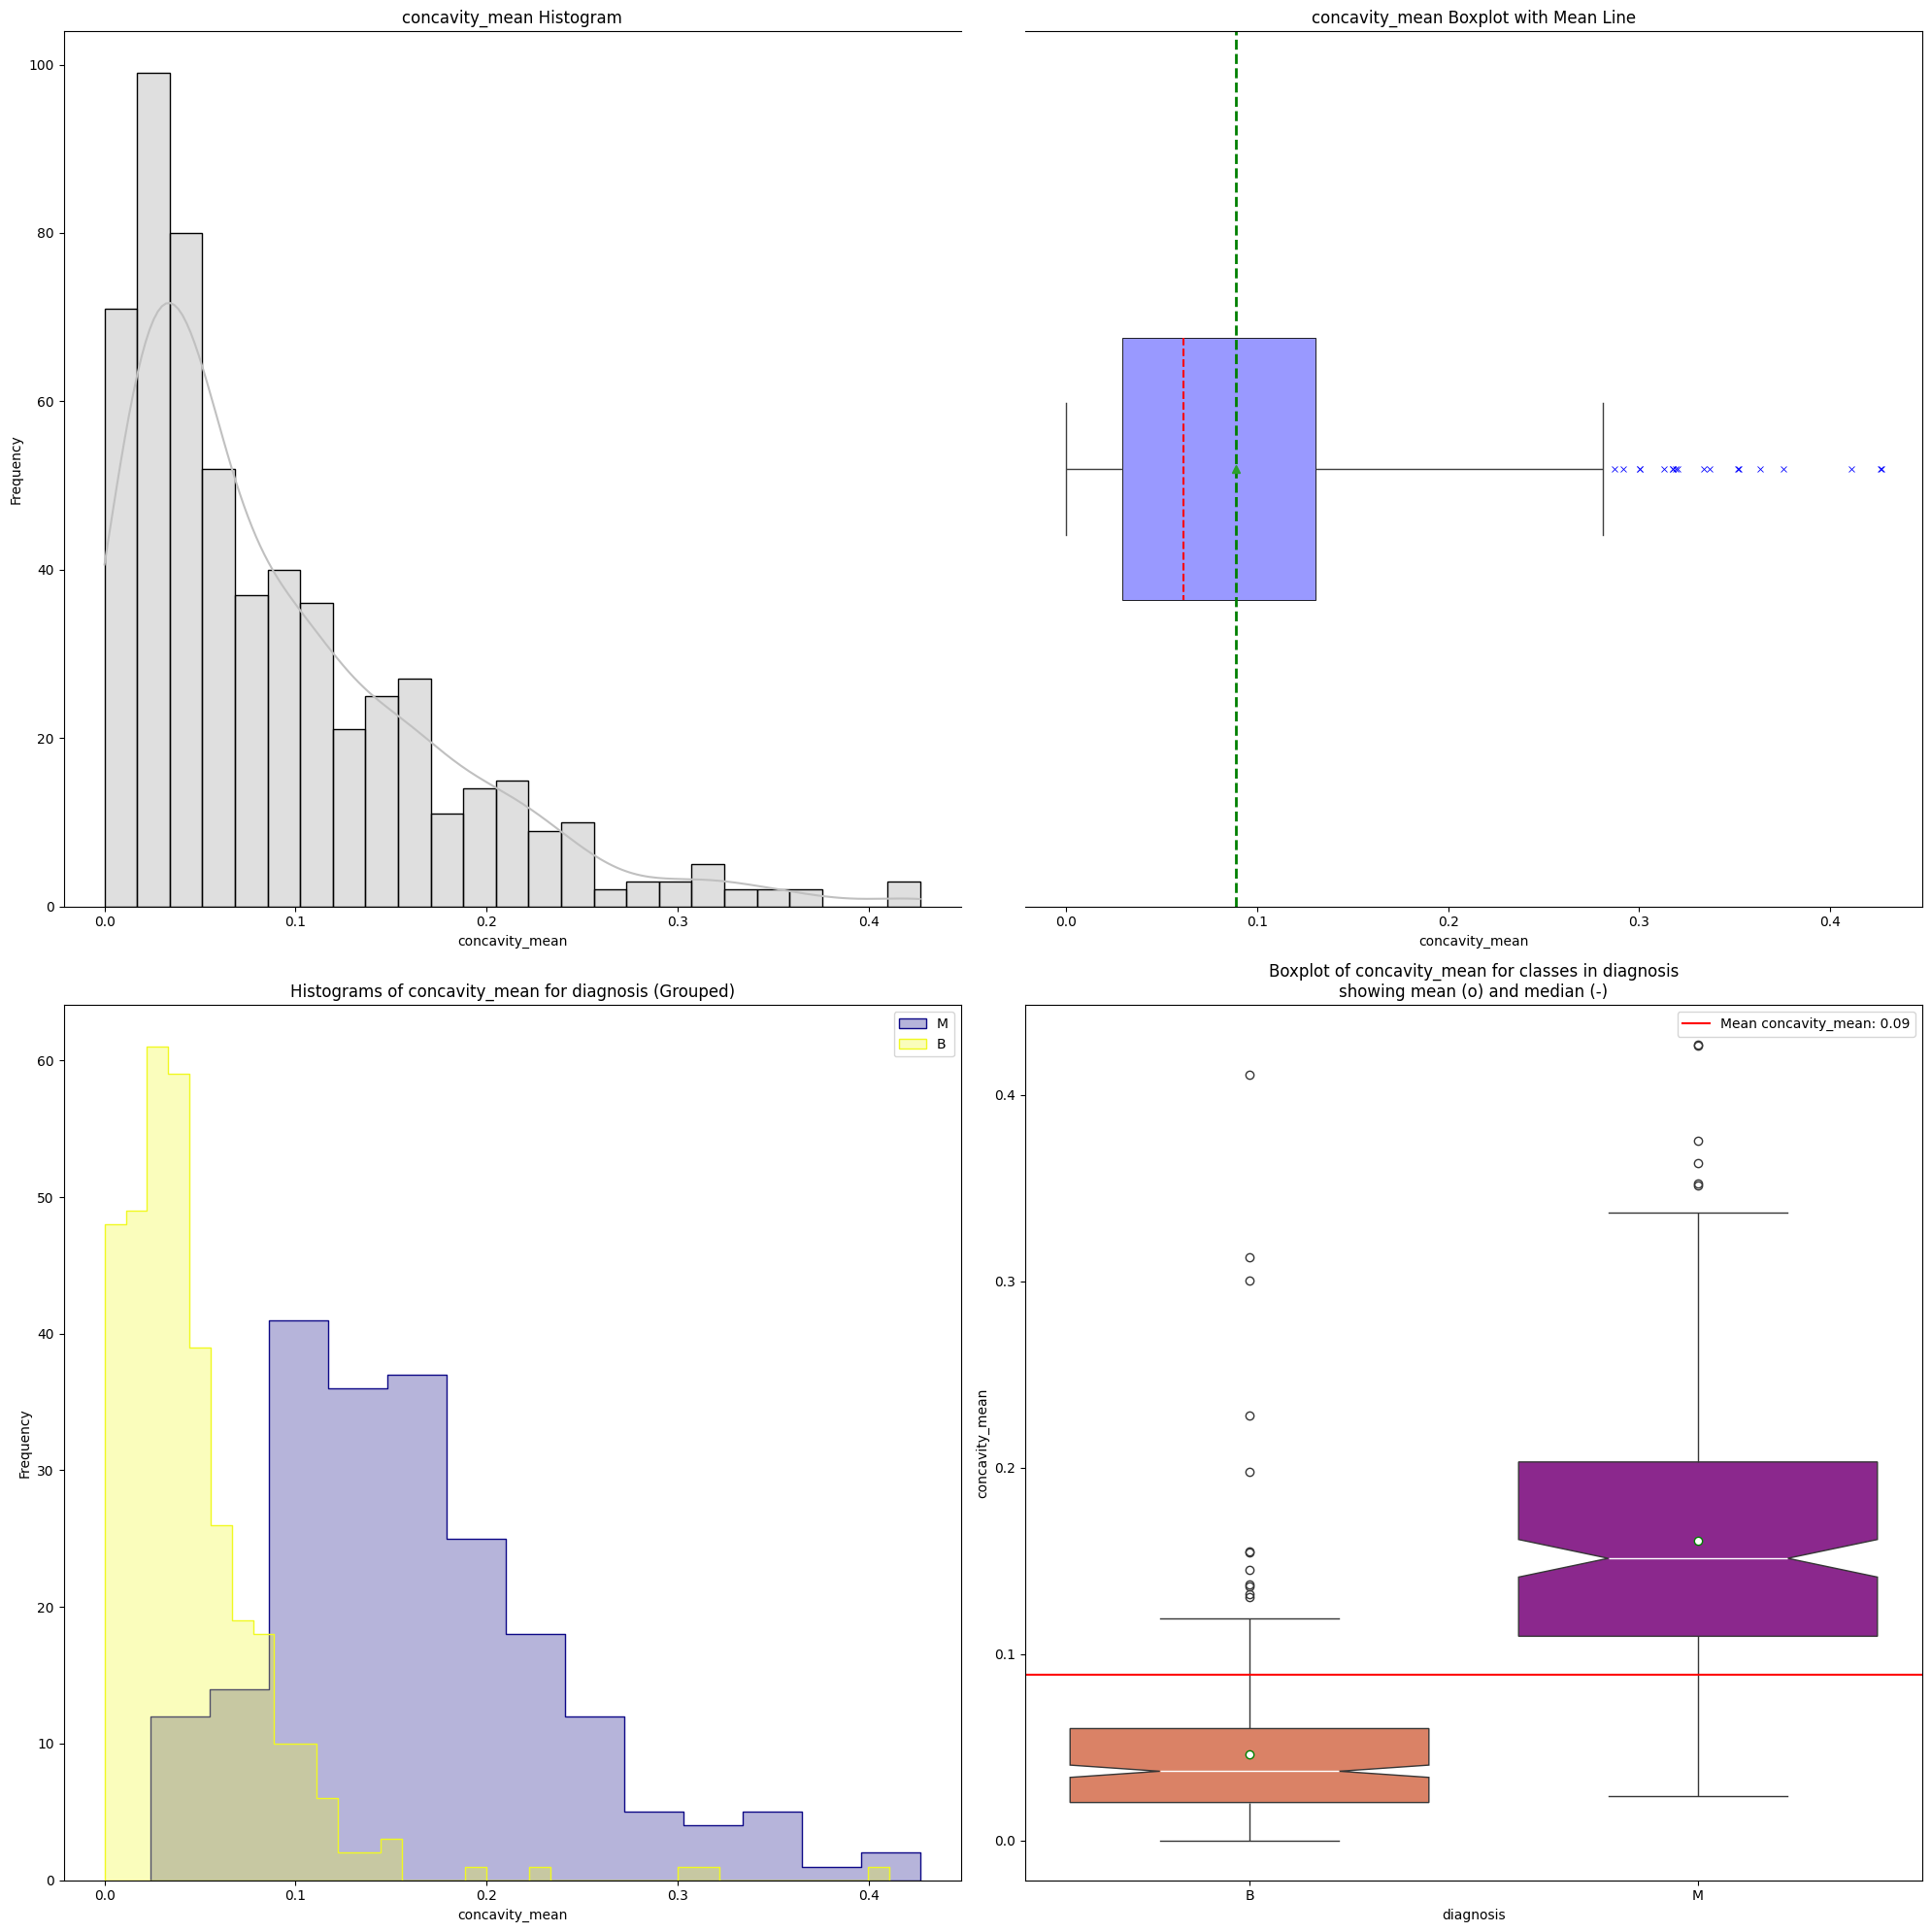

In [23]:
target = target
num_feat = features[6]
print(num_feat)
viz.plotAll4(df, cat_col=target, num_col=num_feat, show_mean=True)

- keep
- should probably log_transform

In [24]:
visualSelection.append(num_feat)

---

concave points_mean


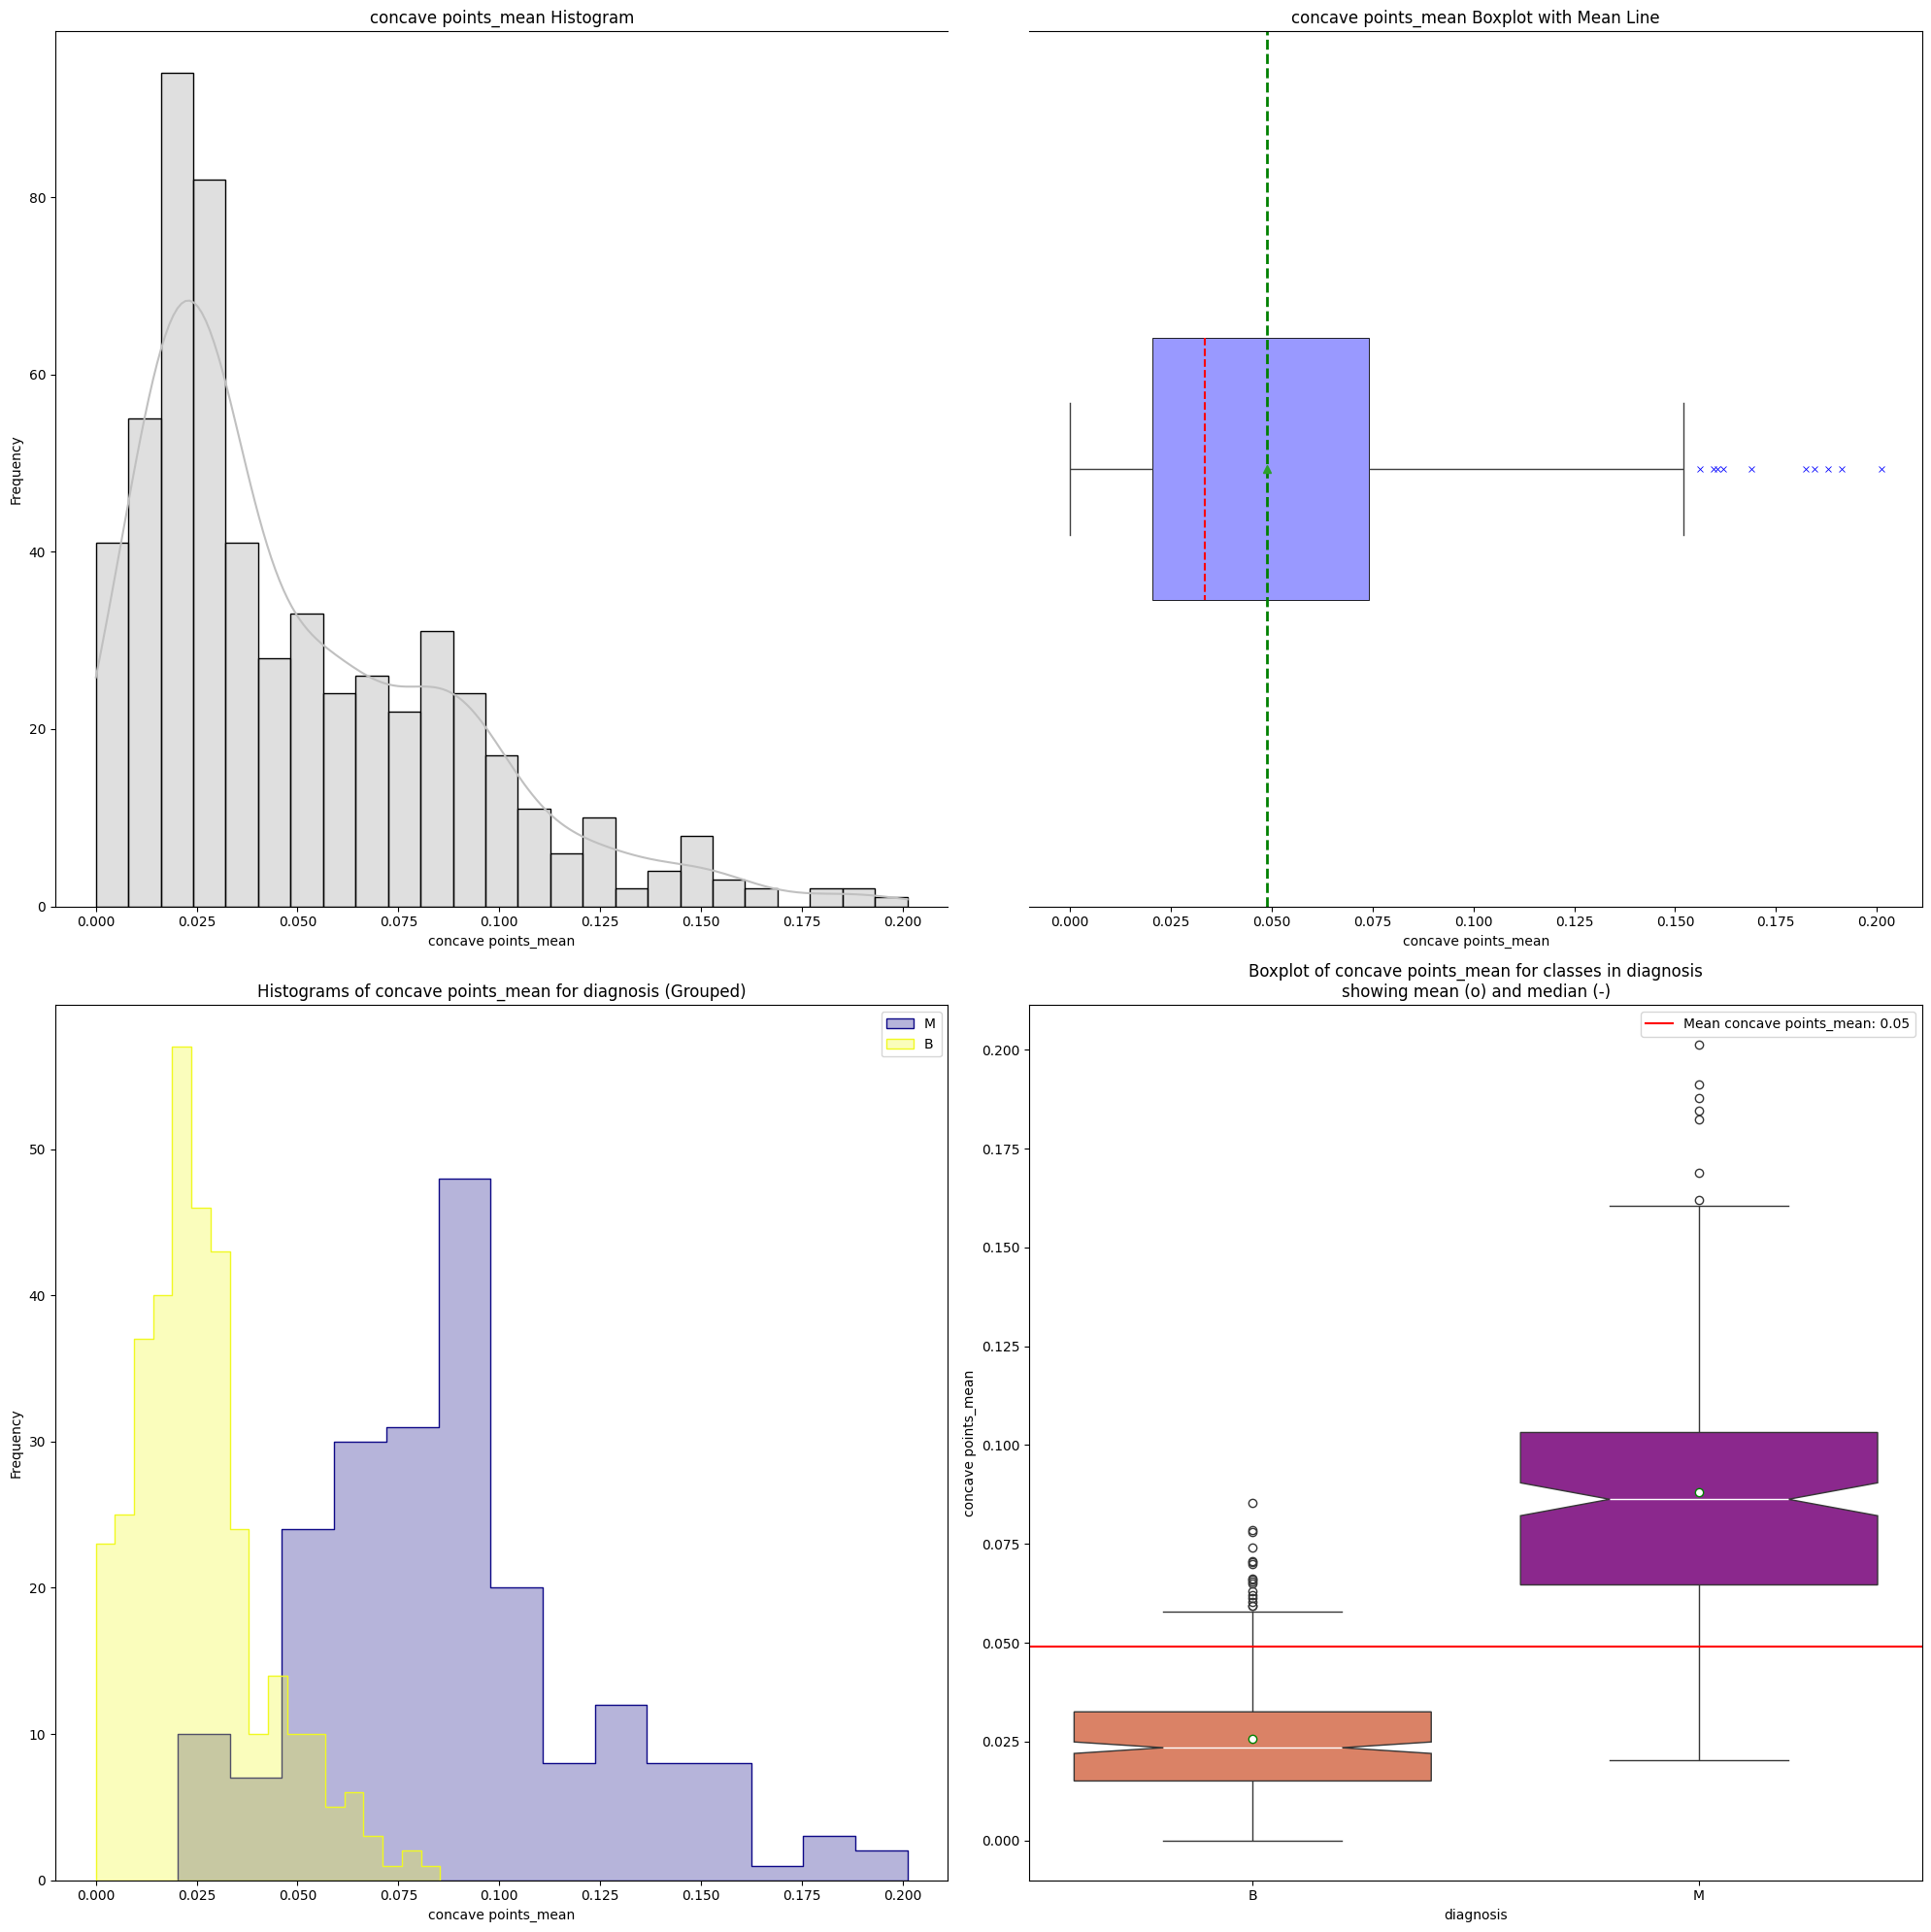

In [25]:
target = target
num_feat = features[7]
print(num_feat)
viz.plotAll4(df, cat_col=target, num_col=num_feat, show_mean=True)

- keep

In [26]:
visualSelection.append(num_feat)

---

symmetry_mean


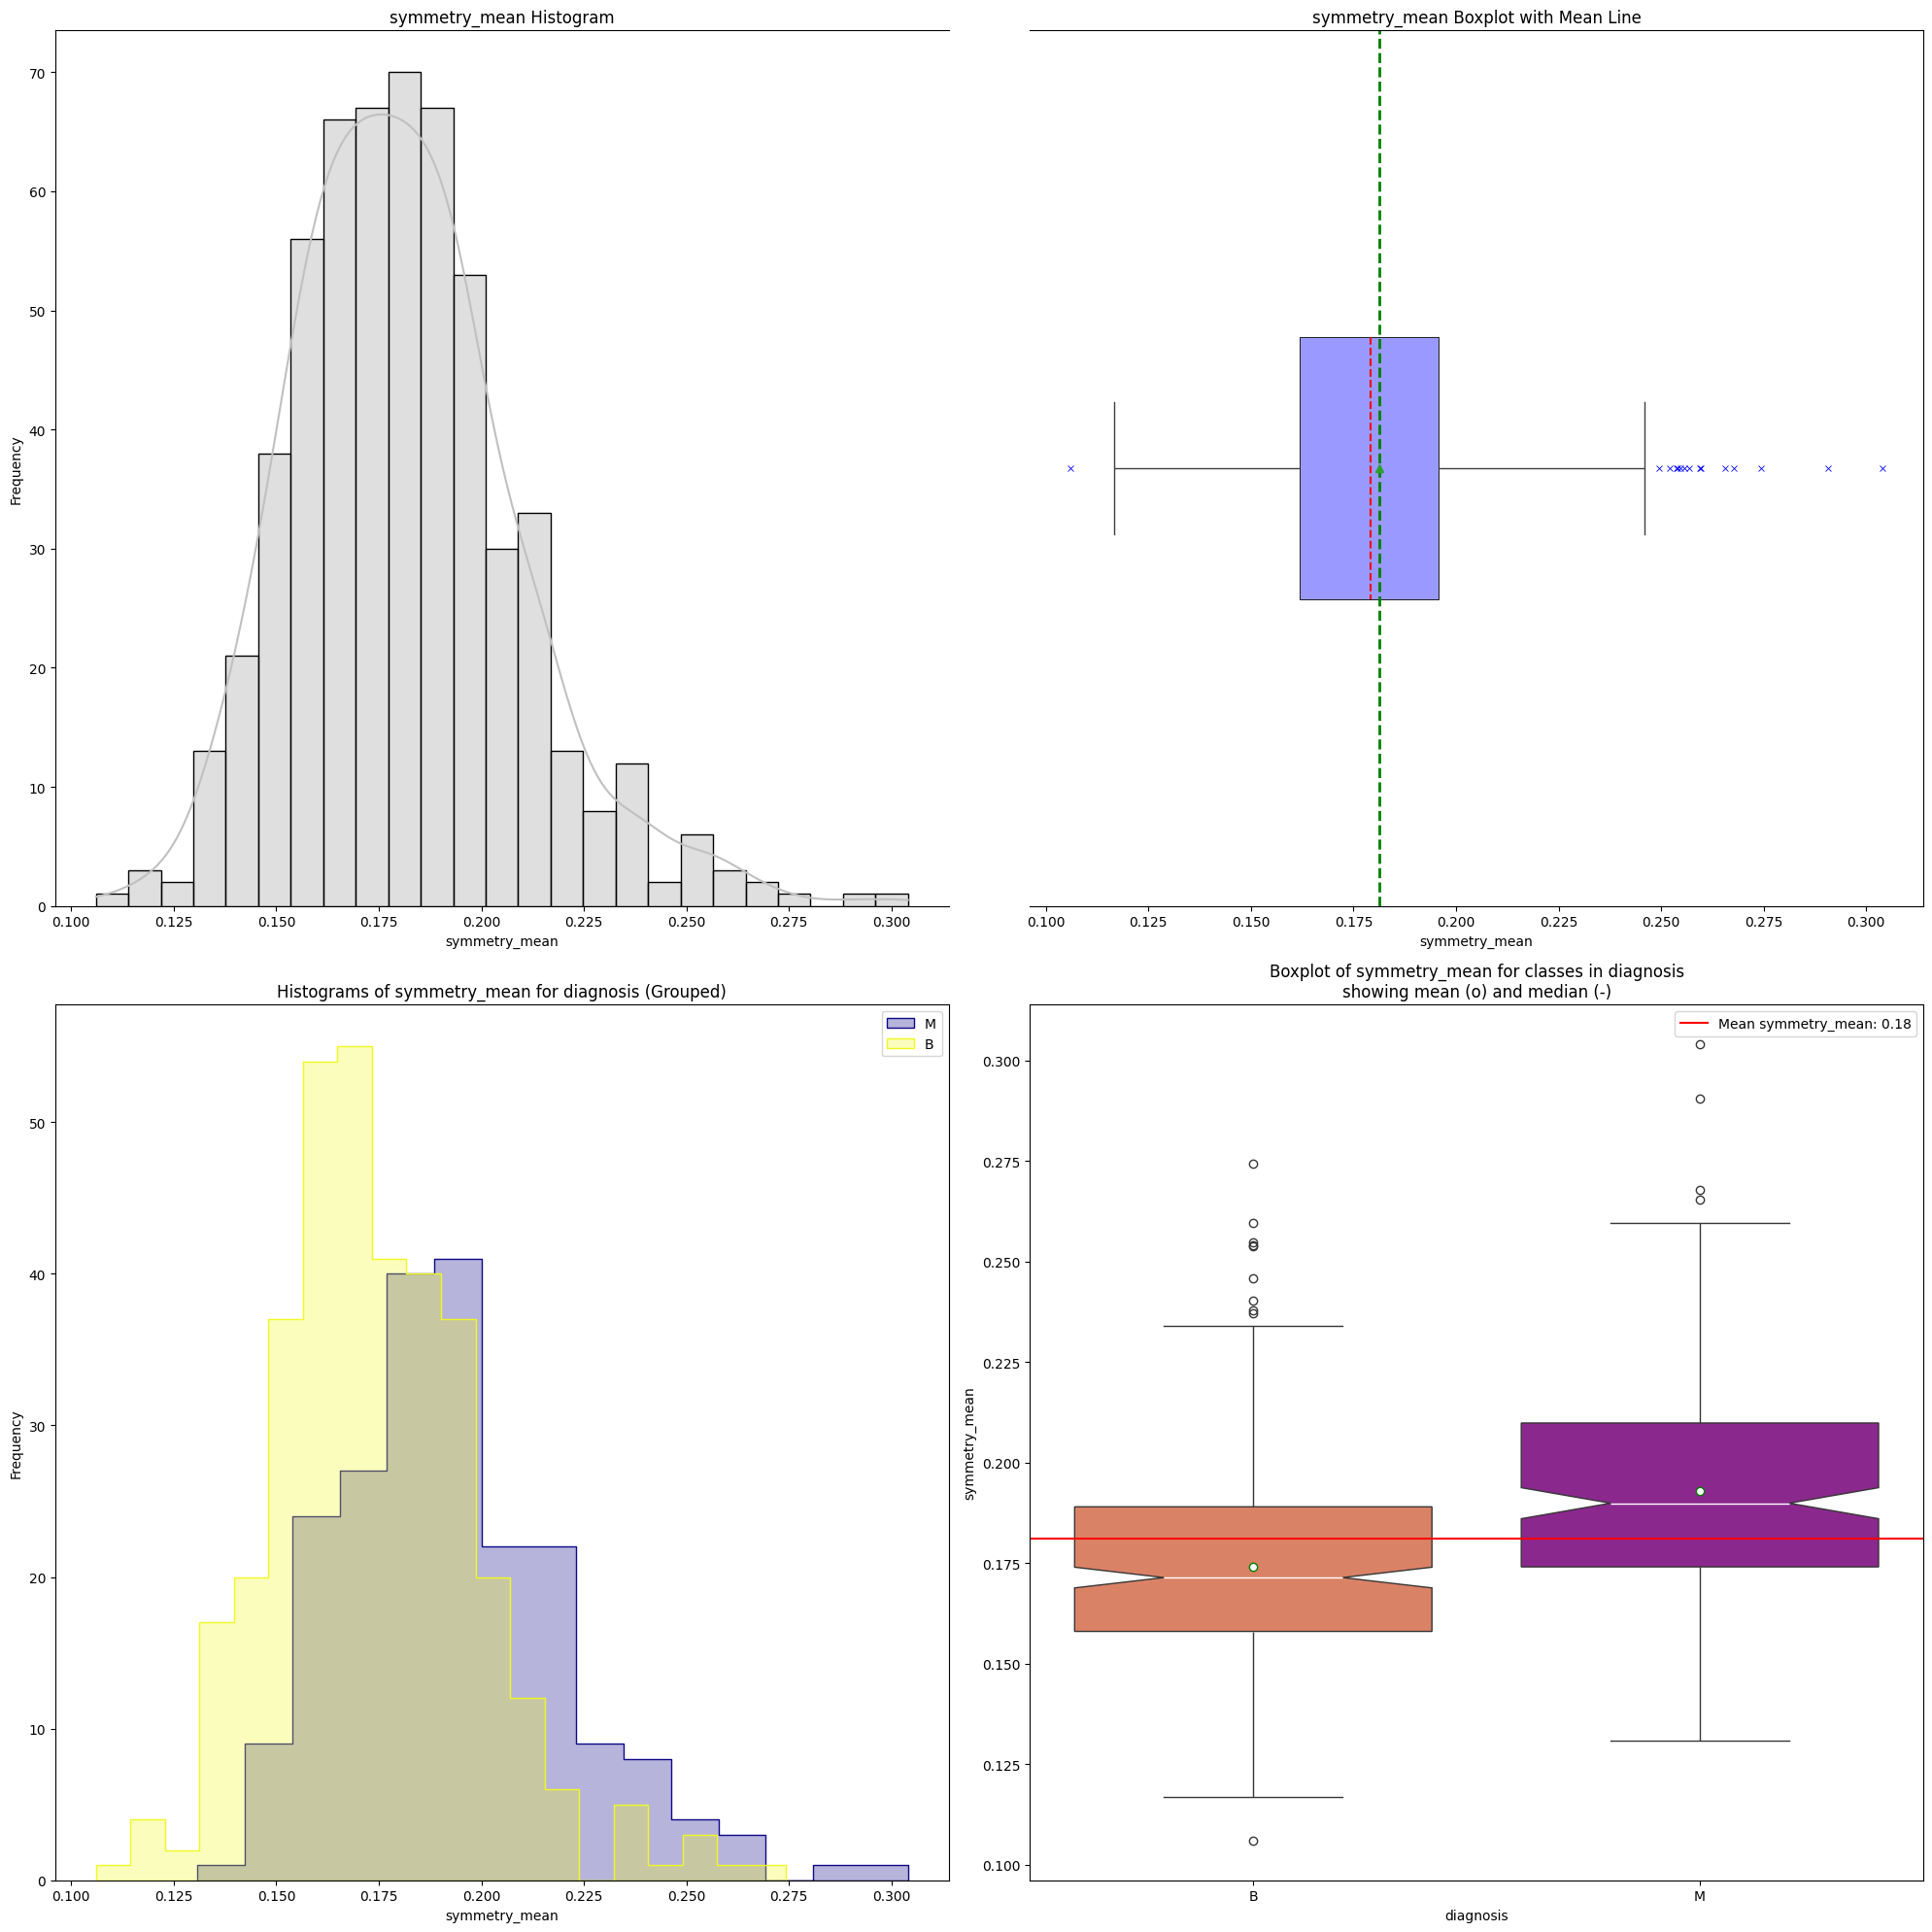

In [27]:
target = target
num_feat = features[8]
print(num_feat)
viz.plotAll4(df, cat_col=target, num_col=num_feat, show_mean=True)

- drop

In [28]:
visualDrop.append(num_feat)

---

fractal_dimension_mean


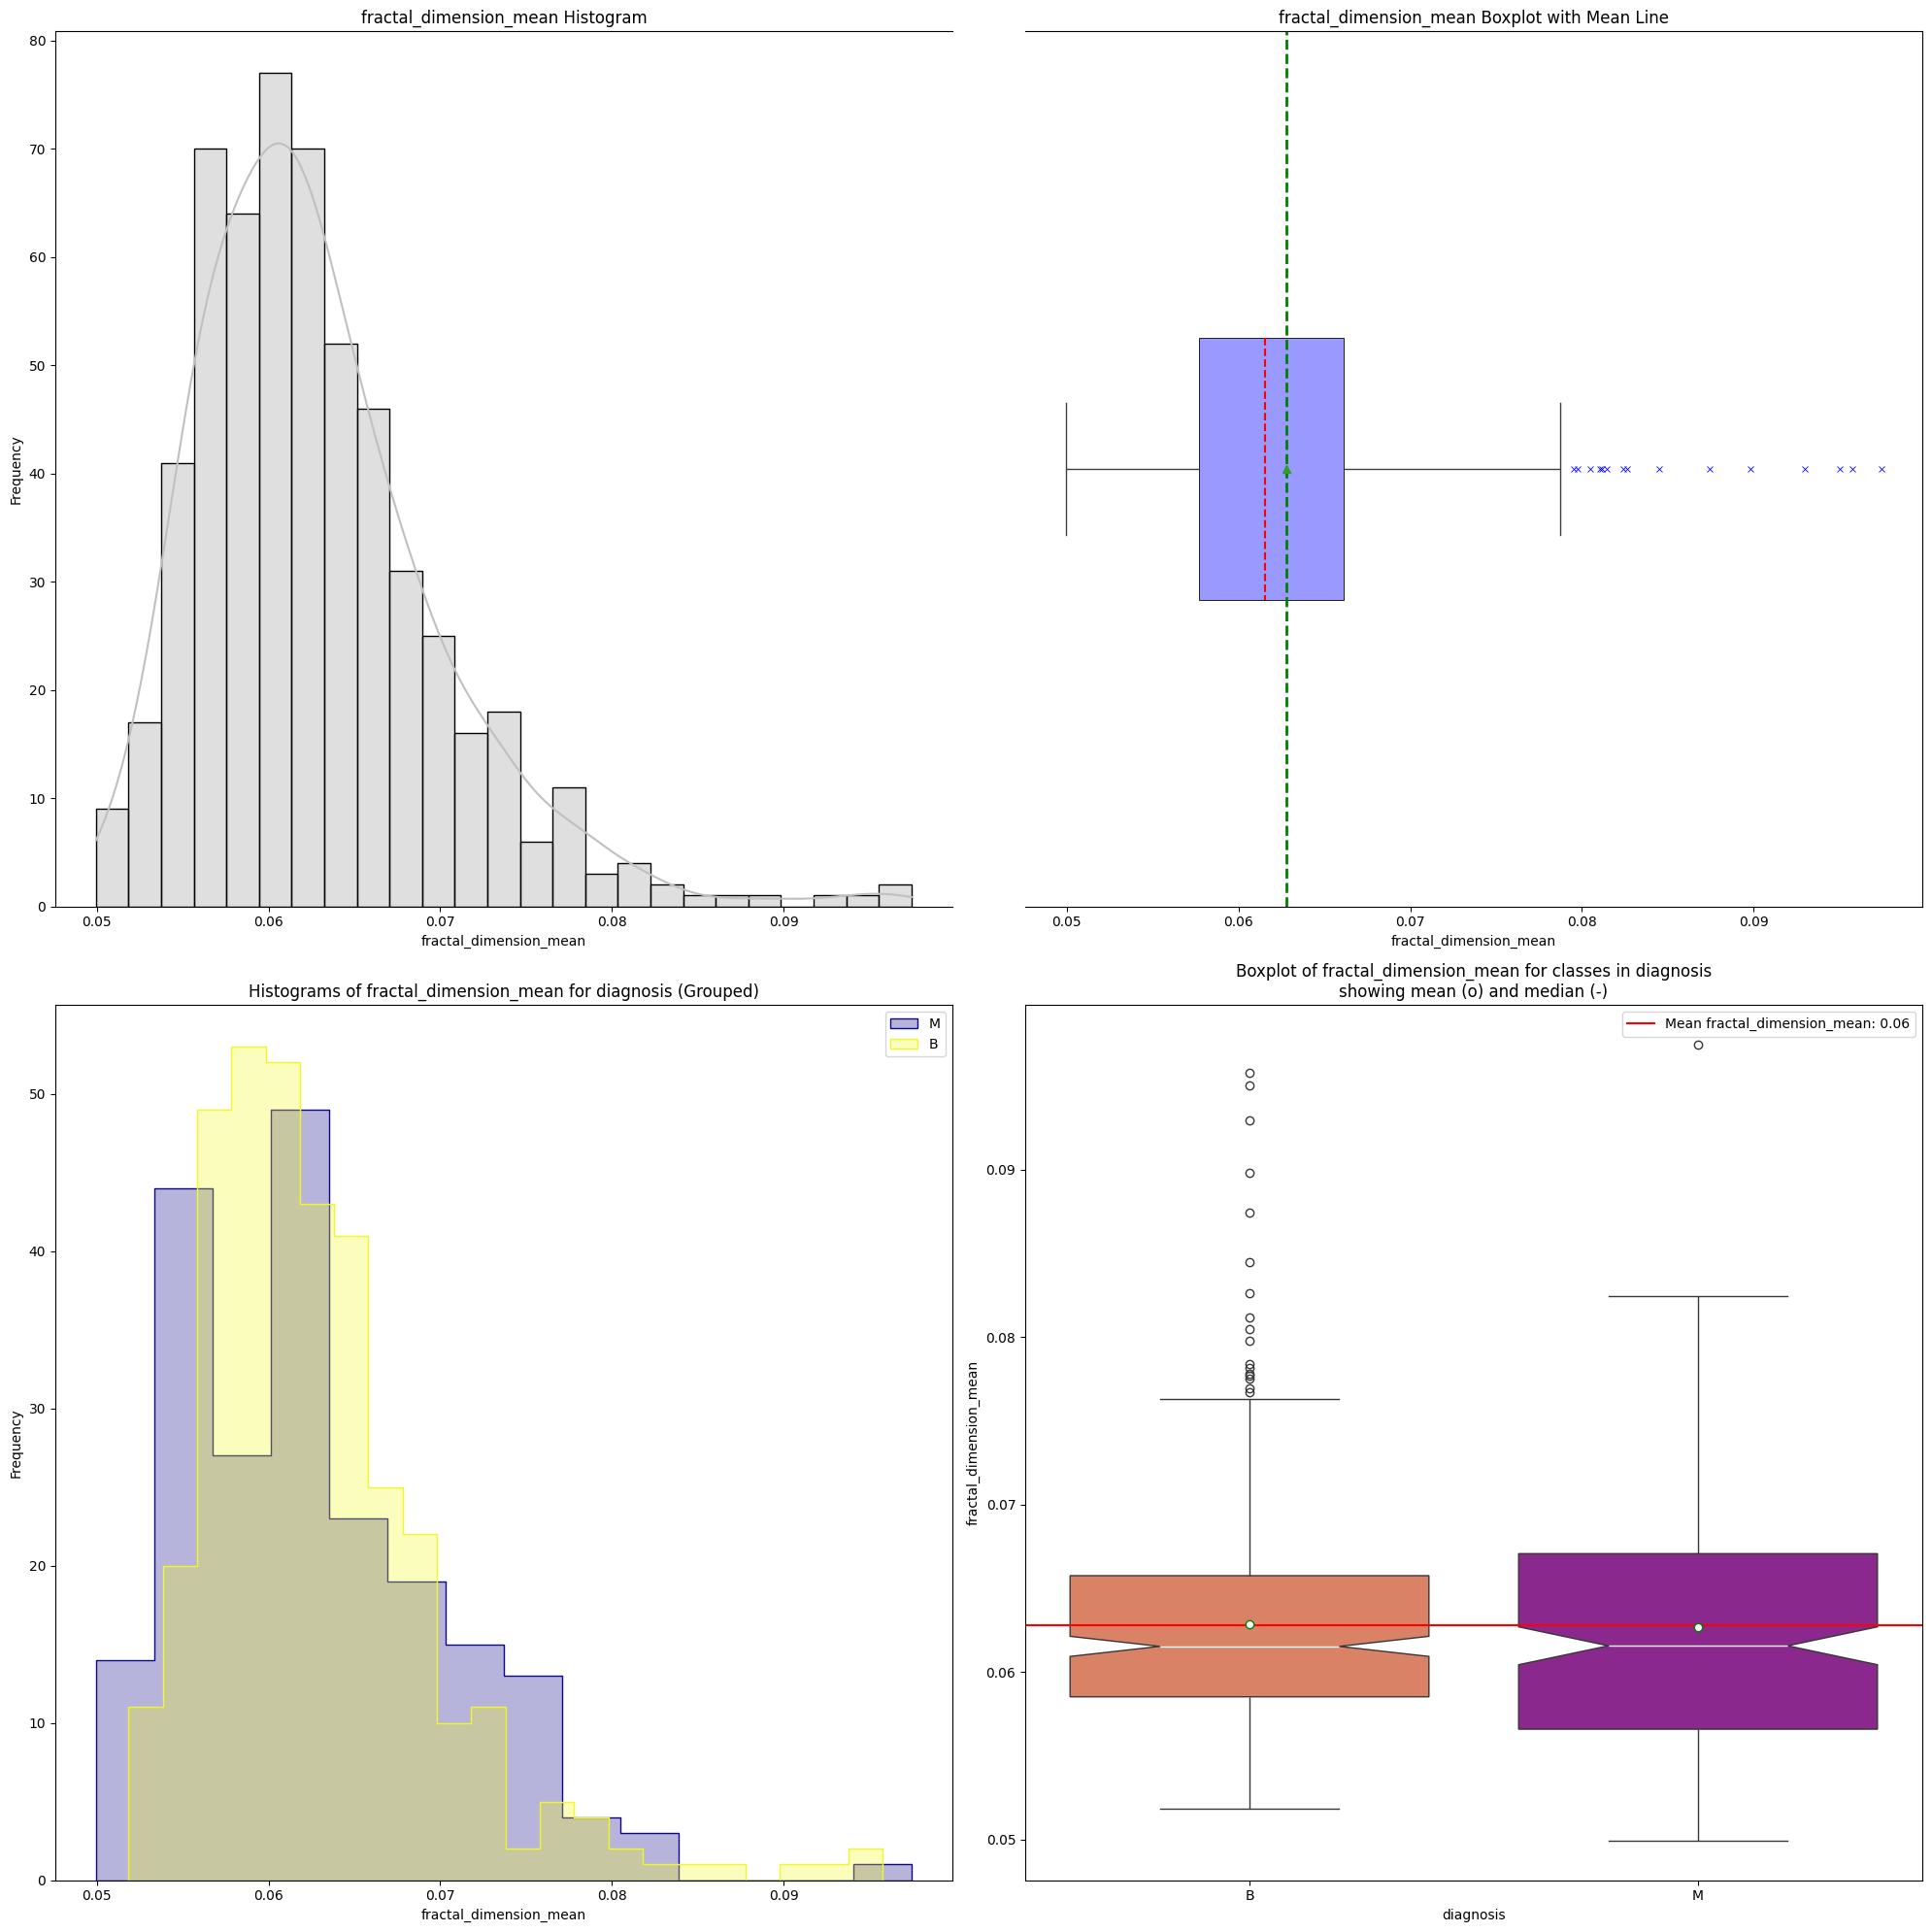

In [29]:
target = target
num_feat = features[9]
print(num_feat)
viz.plotAll4(df, cat_col=target, num_col=num_feat, show_mean=True)

- drop

In [30]:
visualDrop.append(num_feat)

In [31]:
visualSelection

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean']

In [32]:
visualDrop

['smoothness_mean', 'symmetry_mean', 'fractal_dimension_mean']

### Ejercicio 5

Observa correlaciones entre las features. Utiliza un gráfico apropiado para ello. ¿Crees que sea posible eliminar algunas features para mejorar el modelo? (No hace falta que lo hagas ahora, lo haremos si es necesario en un ejercicio posterior)

In [44]:
allFeatures = [col for col in df.columns if col != target]

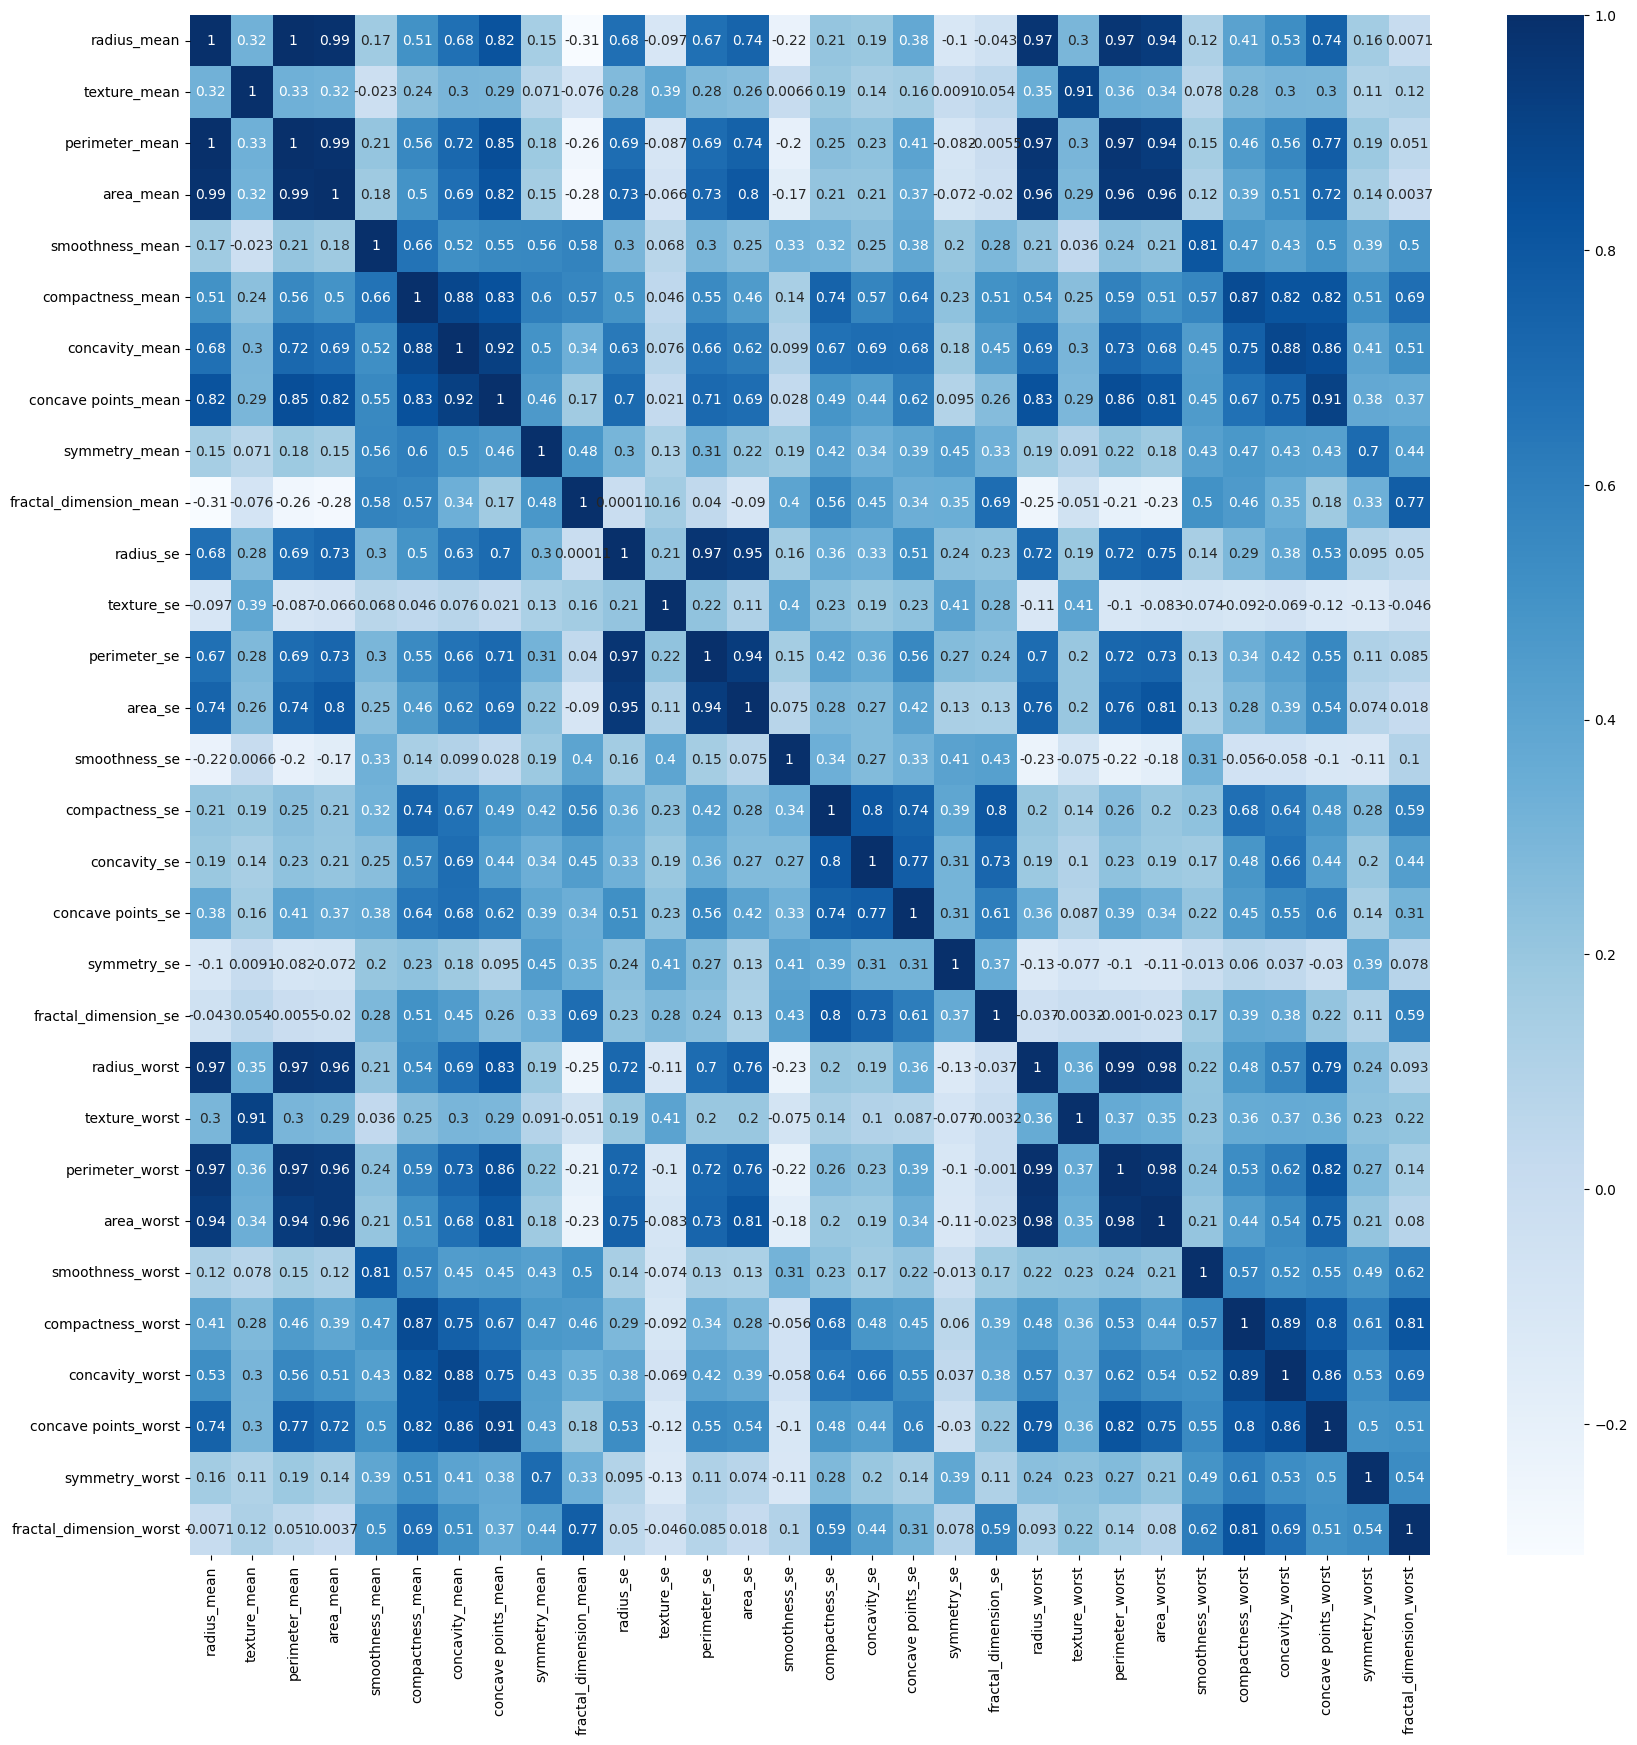

In [47]:
corr = df[allFeatures].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

- i would get rid of perimeter and radius as they are both transmitted in area
- get rid of all the se and worst features
- compactness and concave points as well...

In [37]:
visualSelection.remove('radius_mean')
visualSelection.remove('perimeter_mean')

In [38]:
visualSelection

['texture_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean']

### Ejercicio 6:

Entrena (con validación cruzada) un modelo de RandomForestClassifier (con max_depth a 5) con todas las features (ojo incluso las que descartamos en el ejercicio 4) y guarda el perfomance ("balanced_accuracy") en test en una variable. Será nuestro base line de comparación

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

X_train = train.drop(target, axis=1)
y_train = train[target]

rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

bslBalancedAcc = np.mean(cross_val_score(rf, X_train, y_train, cv=5, scoring='balanced_accuracy'))
print(f'Baseline balanced accuracy: {bslBalancedAcc *100:.4f}%')

Baseline balanced accuracy: 95.0671%


### Ejercicio 7

Vamos a emplear nuestras features del análisis visual pero descartando variables correladas entre sí (emplea la matriz ya obtenida en el ejercicio 5 o bien cualquier medio que creas conveniente). Descarta features y muestra la matriz de correlación para la selección final (recuerda, parte de la lista creada en el ejercicio 4)

In [50]:
droppers = ['perimeter_mean','radius_mean','compactness_mean',
             'concave points_mean','radius_se','perimeter_se',
             'radius_worst','perimeter_worst','compactness_worst',
             'concave points_worst','compactness_se','concave points_se',
             'texture_worst','area_worst', 'area_se', 'concavity_mean',
             'fractal_dimension_mean','smoothness_mean']

visualFeaturesFin = [col for col in df.columns if col not in droppers and col != target]

In [51]:
visualFeaturesFin

['texture_mean',
 'area_mean',
 'symmetry_mean',
 'texture_se',
 'smoothness_se',
 'concavity_se',
 'symmetry_se',
 'fractal_dimension_se',
 'smoothness_worst',
 'concavity_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

<Axes: >

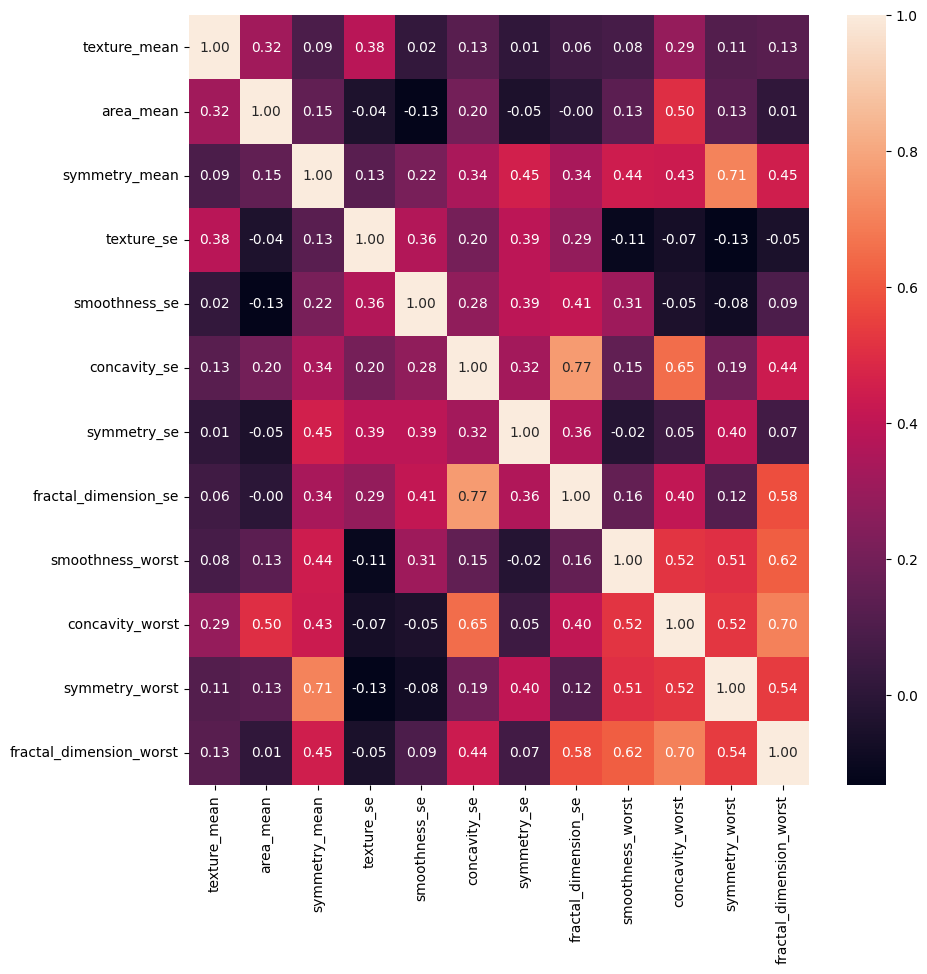

In [52]:
plt.figure(figsize=(10,10))
sns.heatmap(X_train[visualFeaturesFin].corr(), annot=True, fmt='.2f')

### Ejercicio 8

Evalúa tu primer feature reduction. Entrena un modelo y evalúa su perfomance con los features que seleccionaste en el ejercicio anterios (emplea la validación cruzada)

In [53]:
rf_visual = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)

visualScore = np.mean(cross_val_score(rf_visual, X_train[visualFeaturesFin], y_train, cv=5, scoring='balanced_accuracy'))
print(f'Visual selection model balanced accuracy: {visualScore *100:.4f}%')
print(f'Visual model num features: {len(visualFeaturesFin)}')
print(f'Baseline balanced accuracy: {bslBalancedAcc *100:.4f}%')
print(f'Basline num features: {len(X_train.columns)}')

Visual selection model balanced accuracy: 94.4788%
Visual model num features: 12
Baseline balanced accuracy: 95.0671%
Basline num features: 30


### Ejercicio 9

Prueba ahora a hacer una feature selection utilizando ANOVA. Compara la validación cruzada con la del modelo baseline y con la del modelo anterior. (Pista: SelectKbest)

In [57]:
from sklearn.feature_selection import SelectKBest, f_classif

nFeaturesANOVA = 5

selectFeature = SelectKBest(f_classif, k=nFeaturesANOVA).fit(X_train, y_train)

bestFeatures = pd.DataFrame({'Feature': X_train.columns, 'Score':selectFeature.scores_}).sort_values(by='Score', ascending=False)
featuresANOVA = selectFeature.get_feature_names_out()
bestFeatures.head()

,Feature,Score
27,concave points_worst,733.724933
22,perimeter_worst,717.246487
20,radius_worst,692.861395
7,concave points_mean,684.526845
2,perimeter_mean,548.413236


In [55]:
featuresANOVA

array(['perimeter_mean', 'concave points_mean', 'radius_worst',
       'perimeter_worst', 'concave points_worst'], dtype=object)

### Ejercicio 10

Prueba a hacer ahora una selección de features con RFE (Recursive Feature Elimination), hasta quedarte con 5 features. Evalúa perfomance en "balanced_accuracy" con cross_validation y compara con la baseline.

In [58]:
from sklearn.feature_selection import RFE

rfRFE = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

numFeaturesRFE = 5
rfe = RFE(estimator=rfRFE, n_features_to_select=numFeaturesRFE, step=1)
rfe = rfe.fit(X_train, y_train)

X_trainRFE = rfe.transform(X_train)

rfeScore = np.mean(cross_val_score(rfRFE, X_trainRFE, y_train, cv=5, scoring='balanced_accuracy'))

print(f'RFE Score: {rfeScore * 100 :.4f}%')

RFE Score: 93.5397%


In [59]:
rfe.get_feature_names_out()

array(['concave points_mean', 'radius_worst', 'perimeter_worst',
       'area_worst', 'concave points_worst'], dtype=object)

### Ejercicio 11

Prueba a eliminar features con el modelo de RandomForestClassifier (emplea SelectFromModel de sklearn). Utiliza esta vez una regresión logística para entrenar con las features escogidas y compara con el baseline. Muestra primero la importancia obtenida con el modelo baseline (que básicamente es el mismo que vamos a usar con SelectFromModel). Prueba primero para features por encima de la mediana y luego para las 5 primeras.

In [61]:
rf.fit(X_train, y_train)
importances = rf.feature_importances_
idx = np.argsort(importances)

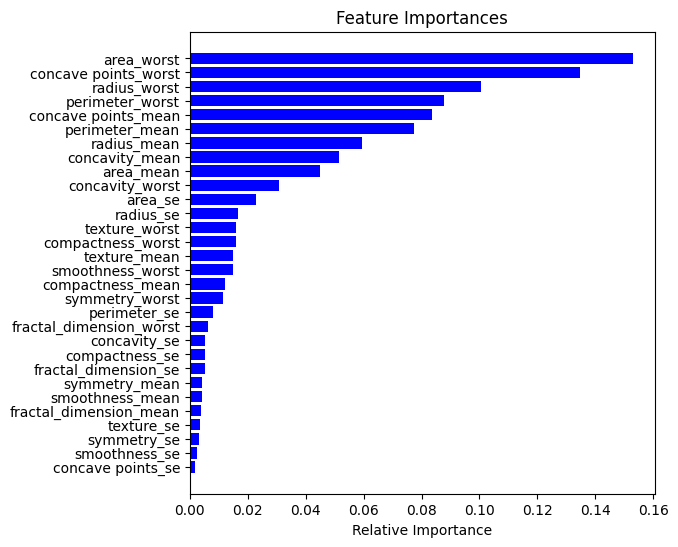

In [62]:
plt.figure(figsize=(6, 6))
plt.title('Feature Importances')
plt.barh(range(len(idx)), importances[idx], color='b', align='center')
plt.yticks(range(len(idx)), [X_train.columns[i] for i in idx])
plt.xlabel('Relative Importance')
plt.show()

In [63]:
from sklearn.feature_selection import SelectFromModel


selector_model = SelectFromModel(estimator = rf, threshold= "median") 
selector_model.fit(X_train,y_train)
print("Escogidas:", selector_model.get_feature_names_out())

Escogidas: ['radius_mean' 'texture_mean' 'perimeter_mean' 'area_mean'
 'concavity_mean' 'concave points_mean' 'radius_se' 'area_se'
 'radius_worst' 'texture_worst' 'perimeter_worst' 'area_worst'
 'compactness_worst' 'concavity_worst' 'concave points_worst']


### Ejercicio EXTRA:

Investiga RFECV y obten el número optimo de features siguiendo esta técnica pero con el "balanced_accuracy" como métrica.